# ARC validation 2022


This notebook contains code and example runs to provide ARC estimates of a set of biophsycial variables over time, given a set of Sentinel-2 MSI observations. The approach is generralisable to other sensors, but that is not done here. Details of thej approach are given in Feng et al. (2024).

The noteboiojk also provides codes to show how to obtain and use the ground measurements collected as a part of this project. The measurements are availabvle in the file [SF_2022_samples_corrected_parsed.geojson](SF_2022_samples_corrected_parsed.geojson).

### requirements

First, we need to install required codes. 

Note that the *first* time you run this notebook, you need to run the `ee.Authenticate()` command and log in with google Earth Engine.

In [1]:
# install required code
!pip install https://github.com/MarcYin/ARC/archive/refs/heads/main.zip

DEPRECATION: Loading egg at /Users/plewis/.local/lib/python3.11/site-packages/linmix-0.1.0.dev1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Using cached https://github.com/MarcYin/ARC/archive/refs/heads/main.zip
  Preparing metadata (setup.py) ... done


In [33]:
import ee

# N.B. the first time you run this, you need to run the ee.Authenticate() command
# ee.Authenticate()
!cat SF_2023.geojson

{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              28.19153237214053,
              -28.18864536930409
            ],
            [
              28.192003729286156,
              -28.189619734217437
            ],
            [
              28.19241071700187,
              -28.190369929956844
            ],
            [
              28.192828756919283,
              -28.19017035605482
            ],
            [
              28.19303604733166,
              -28.190272690962534
            ],
            [
              28.199719928550564,
              -28.18609858269533
            ],
            [
              28.198412806189907,
              -28.184466334765695
            ],
            [
              28.194095094019048,
              -28.18689661744274
            ],
            [
              28.19407837726385,
              -28.18726

In [38]:
# prep required files
import json

!./get_area.sh 2022
# test
with open('wider_area_2022.geojson') as f:
        features = json.load(f)["features"]
        print(features)


[{'type': 'Feature', 'properties': {}, 'geometry': {'coordinates': [[[28.7322, -26.9522], [28.7322, -26.9755], [28.7559, -26.9755], [28.7559, -26.9522], [28.7322, -26.9522]]], 'type': 'Polygon'}}]


To explore the observational dataset, we can visualise the S2 data as NDVI over space and time in the target field. 

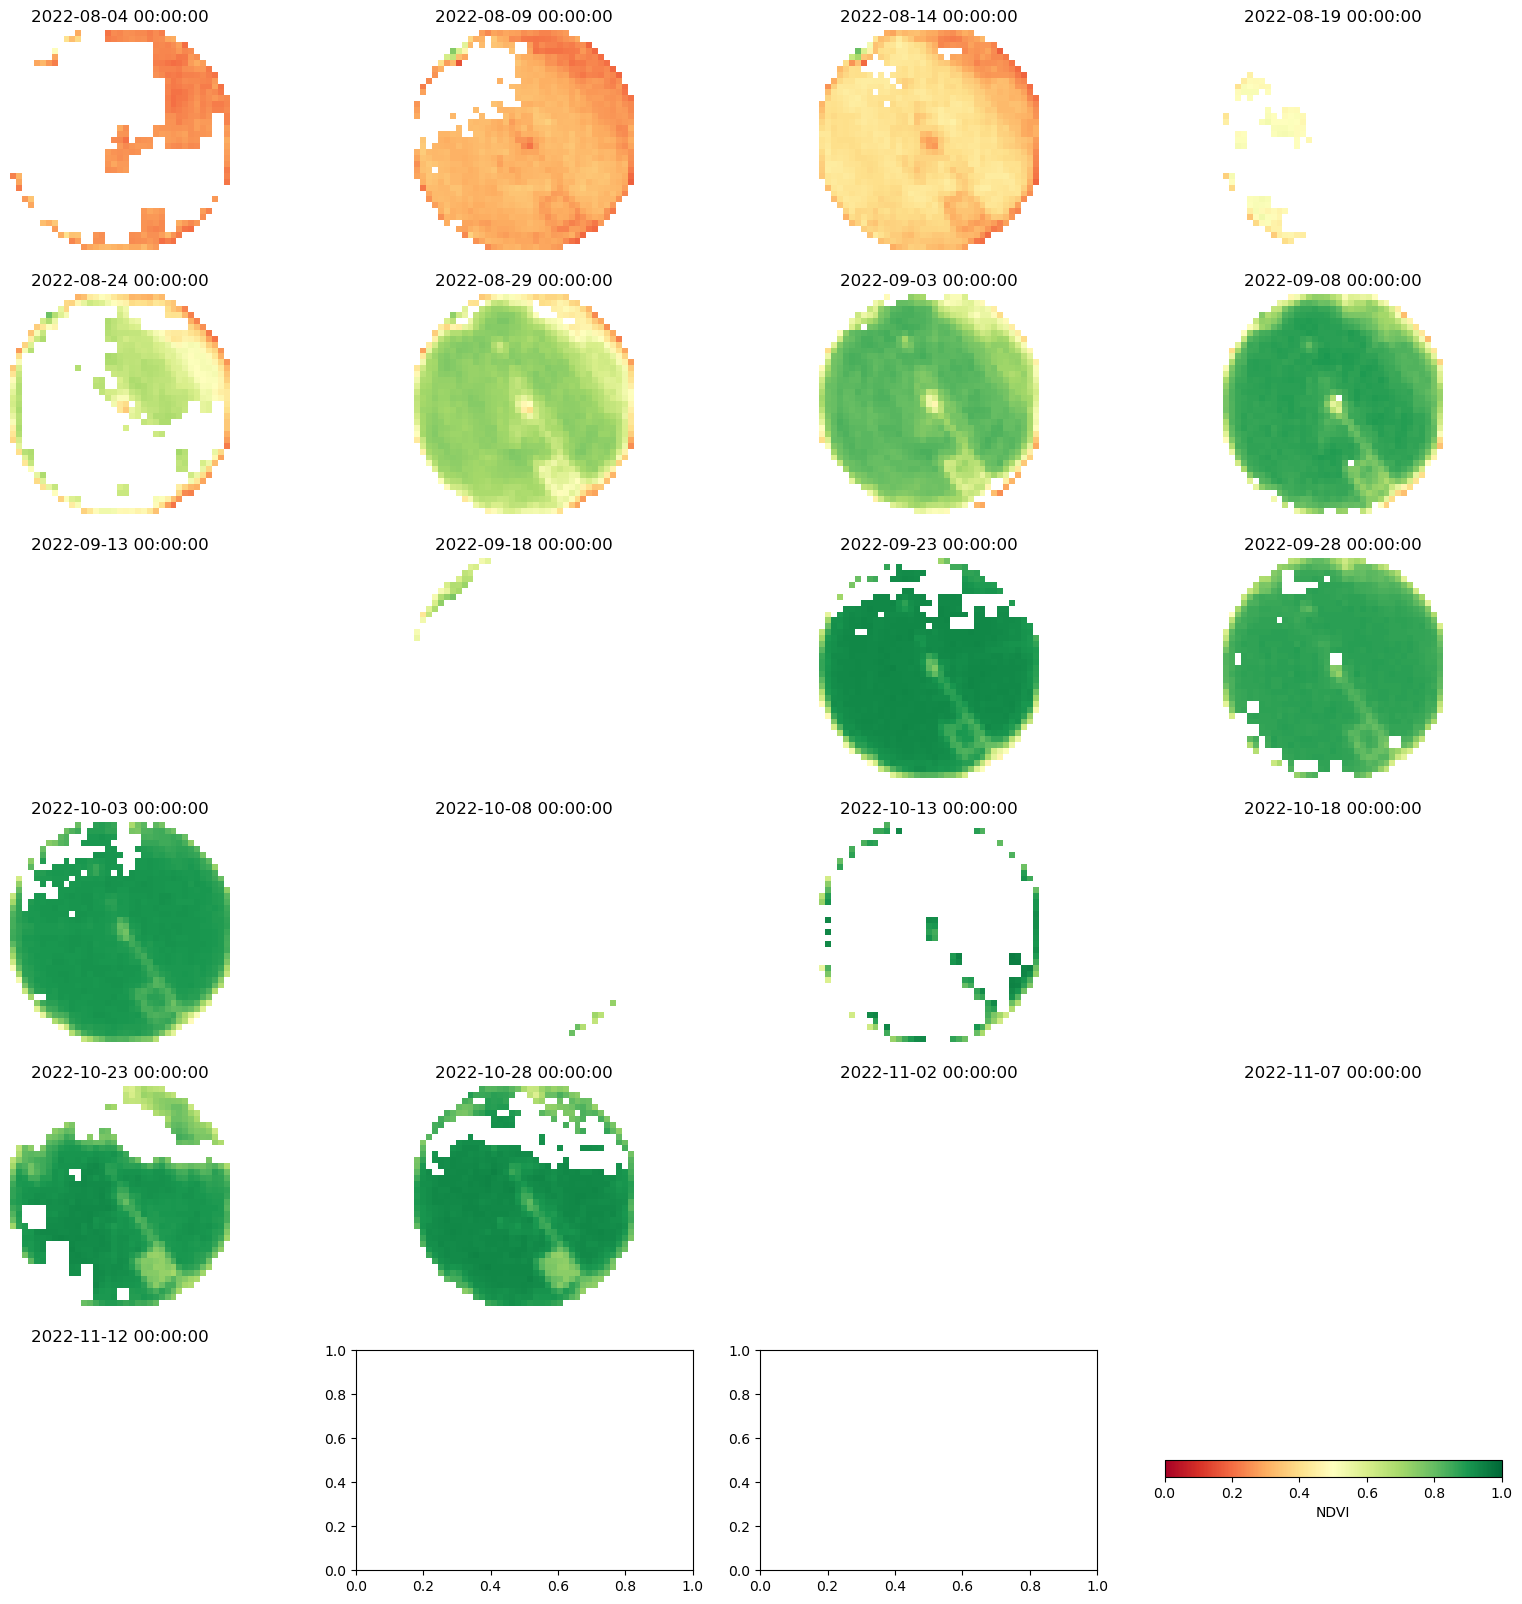

In [53]:
from arc.s2_data_reader import get_s2_official_data
import os
from pathlib import Path
import datetime
import matplotlib.pyplot as plt

geojson_path = "SF_2022.geojson"
S2_data_folder = Path.home() / f"Downloads/{Path(geojson_path).stem}"
S2_data_folder.mkdir(parents=True, exist_ok=True)


start_date = "2022-08-01"
end_date = "2022-12-10"

s2_refs, s2_uncs, s2_angles, doys, mask, geotransform, crs = get_s2_official_data(start_date, end_date, geojson_path, S2_data_folder=S2_data_folder)
ndvi = (s2_refs[:, 7] - s2_refs[:, 2]) / (s2_refs[:, 7] + s2_refs[:, 2])
fig, axs = plt.subplots(6, 4 , figsize=(20, 20))
axs = axs.ravel()
for i in range(21):
    im = axs[i].imshow(ndvi[i], cmap='RdYlGn', vmin=0, vmax=1)
    # plot colorbar
    date = datetime.datetime(2022, 1, 1) + datetime.timedelta(days=int(doys[i]) - 1)
    axs[i].set_title(date)
    axs[i].axis('off')

cbar = fig.colorbar(im, ax=axs[23], orientation='horizontal', fraction=0.5)
cbar.set_label('NDVI')
_=axs[23].axis('off')

The target field avhieves a maximum NDVI of around 0.5, and is much lower in the main, which indicates low LAI. This is in keeping with field observations that the rain-fed field suffered from some water deficiency and only a low LAI was reached.

We see from this that there are 9 or 10 samples that cover the field over the season, with other observation dates masked for cloud and cloud shadow. 

The data are obtained from Google Earth Engine and processed to surface reflectance, using the `ARC` function `get_s2_official_data()`. 

To see this field in context, we can visualise the surrounding area as well:

/var/folders/tn/4vfsqlp15h730wzdcnrx7c300000gn/T/ipykernel_4872/245160527.py:16: RuntimeWarning: invalid value encountered in divide
  ndvi = (s2_refs[:, 7] - s2_refs[:, 2]) / (s2_refs[:, 7] + s2_refs[:, 2])


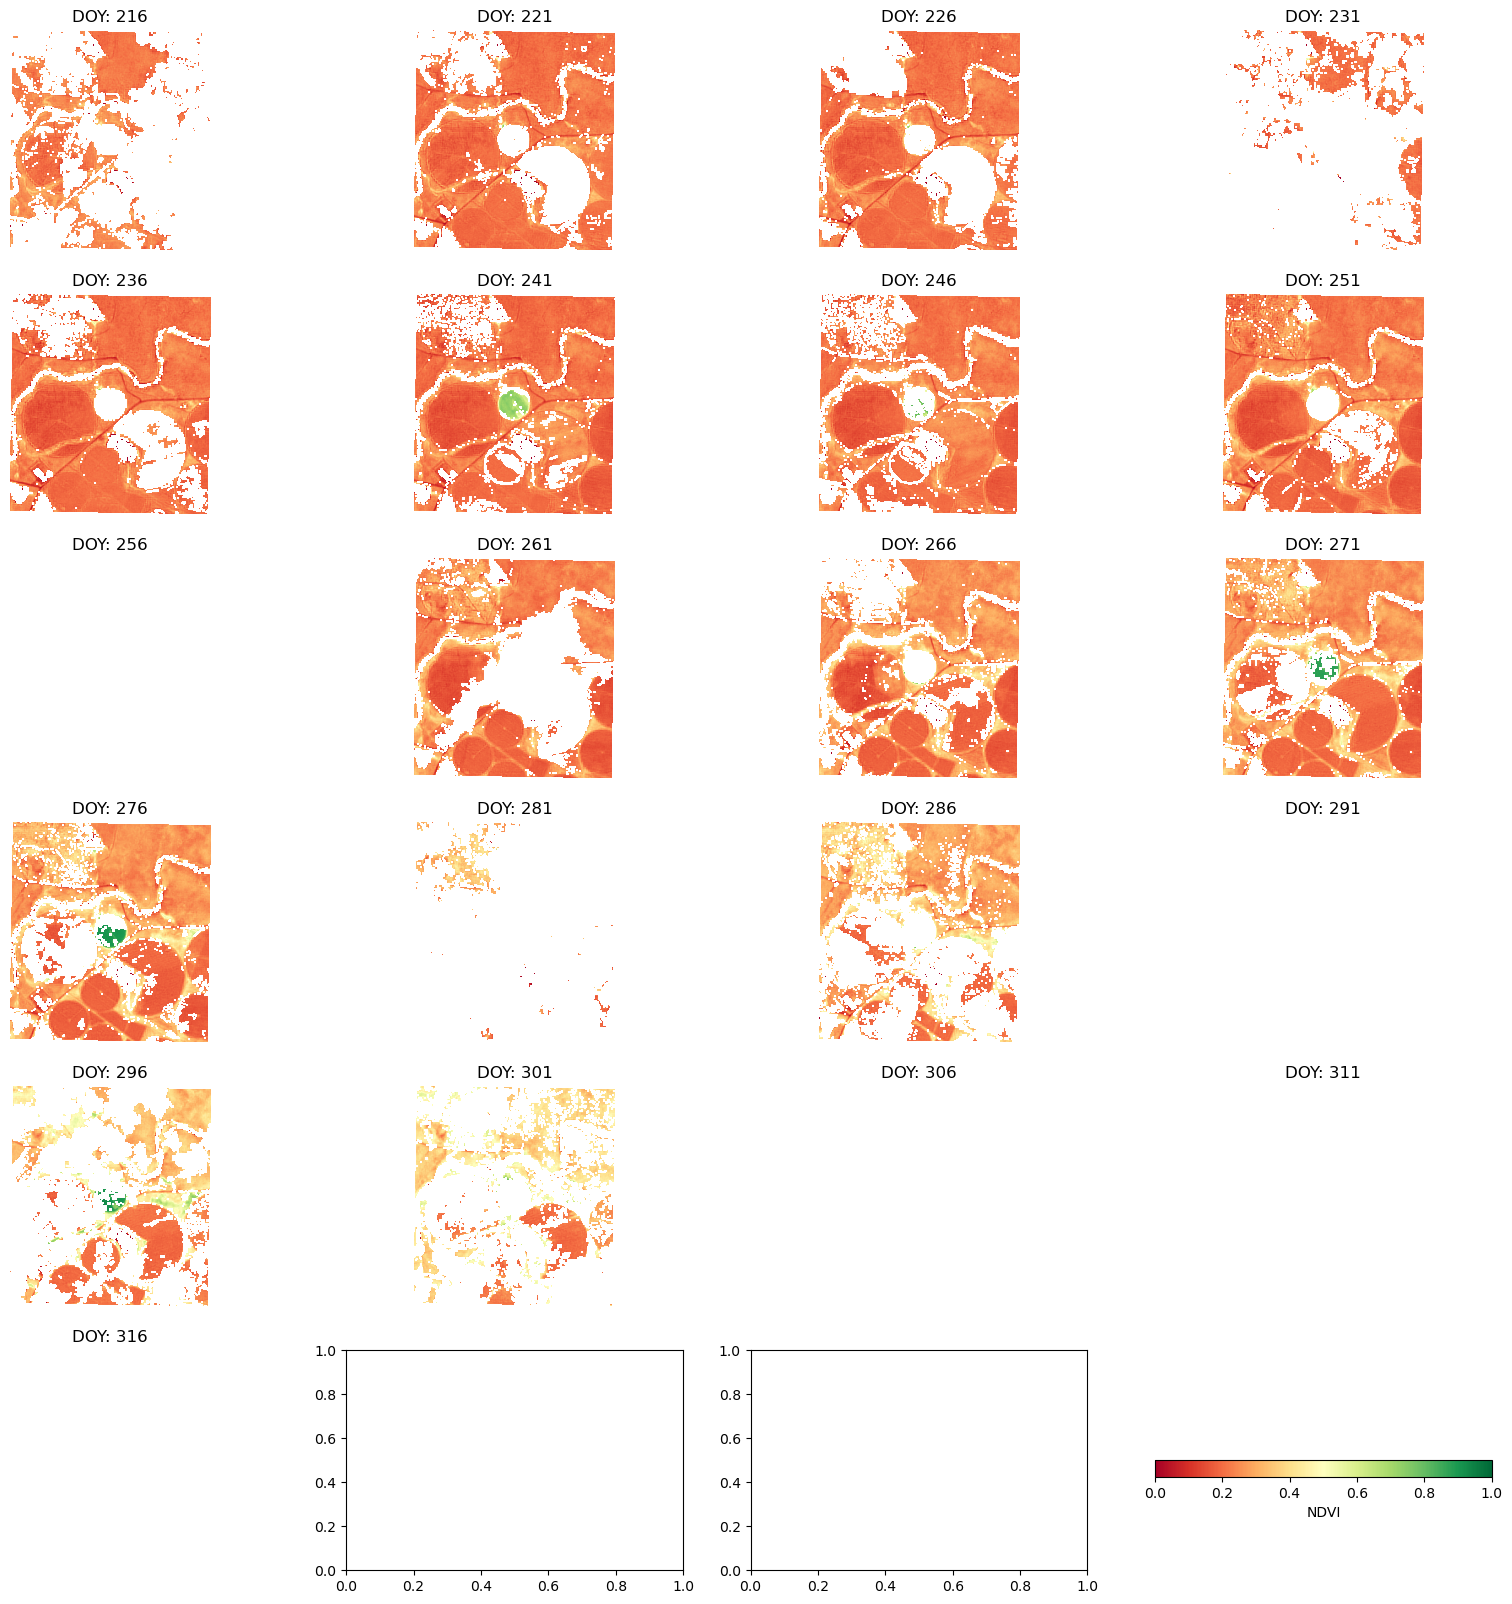

In [45]:
from arc.s2_data_reader import get_s2_official_data
import os
from pathlib import Path

import matplotlib.pyplot as plt

geojson_path = Path.cwd() / "wider_area_2022.geojson"
S2_data_folder = Path.home() / f"Downloads/{Path(geojson_path).stem}"
S2_data_folder.mkdir(parents=True, exist_ok=True)


start_date = "2022-08-01"
end_date = "2022-12-10"

s2_refs, s2_uncs, s2_angles, doys, mask, geotransform, crs = get_s2_official_data(start_date, end_date, geojson_path, S2_data_folder=S2_data_folder)
ndvi = (s2_refs[:, 7] - s2_refs[:, 2]) / (s2_refs[:, 7] + s2_refs[:, 2])
fig, axs = plt.subplots(6, 4 , figsize=(20, 20))
axs = axs.ravel()
for i in range(21):
    im = axs[i].imshow(ndvi[i], cmap='RdYlGn', vmin=0, vmax=1)
    # plot colorbar

    axs[i].set_title(f"DOY: {doys[i]}")
    axs[i].axis('off')

cbar = fig.colorbar(im, ax=axs[23], orientation='horizontal', fraction=0.5)
cbar.set_label('NDVI')
_=axs[23].axis('off')

and in RGB:

/var/folders/tn/4vfsqlp15h730wzdcnrx7c300000gn/T/ipykernel_4872/3276555317.py:15: RuntimeWarning: invalid value encountered in divide
  ndvi = (s2_refs[:, 7] - s2_refs[:, 2]) / (s2_refs[:, 7] + s2_refs[:, 2])
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data t

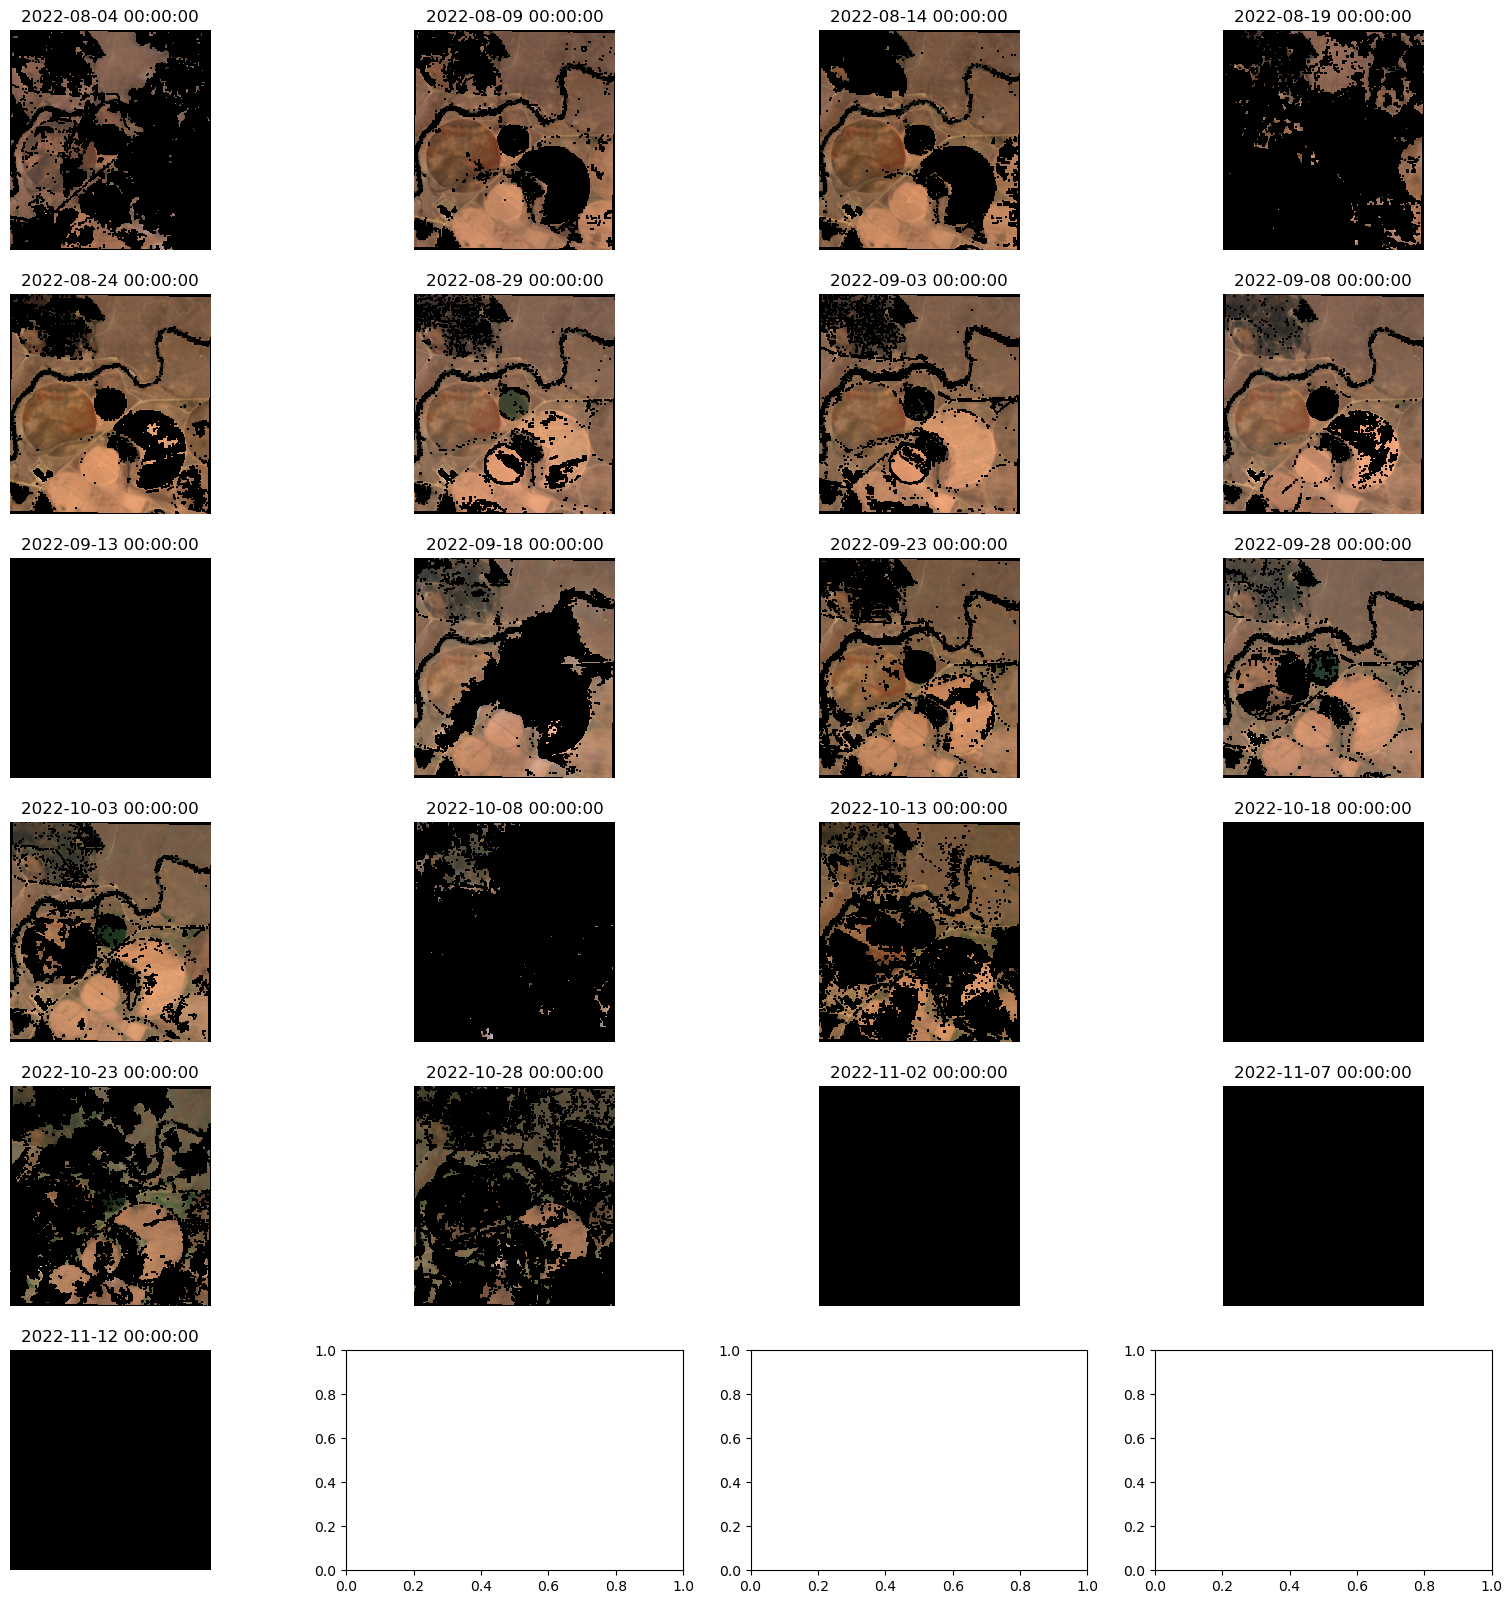

In [43]:
from arc.s2_data_reader import get_s2_official_data
import os
from pathlib import Path
import datetime
import matplotlib.pyplot as plt

geojson_path = Path.cwd() / "wider_area_2022.geojson"
S2_data_folder = Path.home() / f"Downloads/{Path(geojson_path).stem}"
S2_data_folder.mkdir(parents=True, exist_ok=True)

start_date = "2022-08-01"
end_date = "2022-12-10"

s2_refs, s2_uncs, s2_angles, doys, mask, geotransform, crs = get_s2_official_data(start_date, end_date, geojson_path, S2_data_folder=S2_data_folder)
ndvi = (s2_refs[:, 7] - s2_refs[:, 2]) / (s2_refs[:, 7] + s2_refs[:, 2])
fig, axs = plt.subplots(6, 4 , figsize=(20, 20))
axs = axs.ravel()
for i in range(21):
    rgb = s2_refs[i, [2, 1, 0], :, :].transpose((1, 2, 0))
    im = axs[i].imshow(rgb * 4)
    # plot colorbar

    date = datetime.datetime(2022, 1, 1) + datetime.timedelta(days=int(doys[i]) - 1)

    axs[i].set_title(date)
    axs[i].axis('off')

# cbar = fig.colorbar(im, ax=axs[23], orientation='horizontal', fraction=0.5)
# cbar.set_label('NDVI')
# axs[23].axis('off')


We can also visualise the dataset as RBG images. AGain, we can see that the target field is mostly quite brown, and certainly hads lower LAI than the field just to the North of the target.

If we visualise the NDVI for all field samples over time, we see a gradual increase in LAI (thence LAI) 

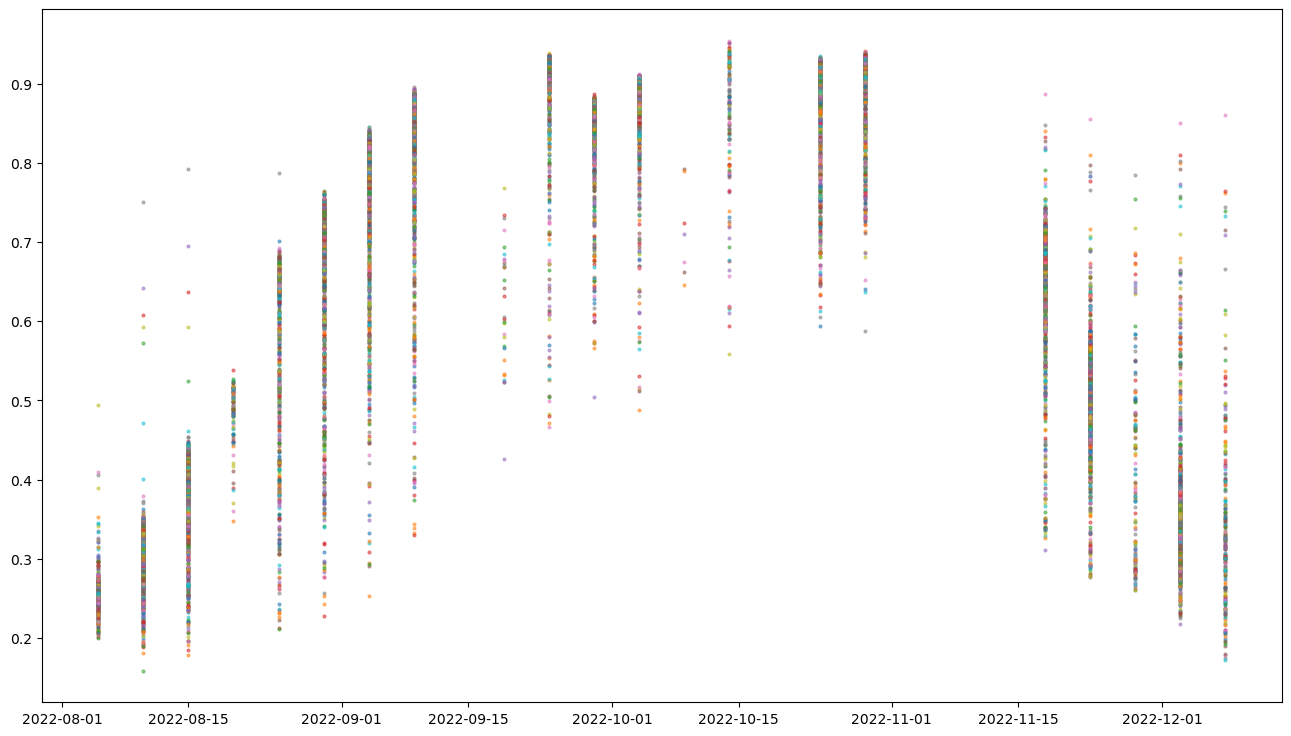

In [54]:
plt.figure(figsize=(16, 9))
geojson_path = "SF_2022.geojson"
S2_data_folder = Path.home() / f"Downloads/{Path(geojson_path).stem}"
S2_data_folder.mkdir(parents=True, exist_ok=True)


start_date = "2022-08-01"
end_date = "2022-12-10"

s2_refs, s2_uncs, s2_angles, doys, mask, geotransform, crs = get_s2_official_data(start_date, end_date, geojson_path, S2_data_folder=S2_data_folder)
ndvi = (s2_refs[:, 7] - s2_refs[:, 2]) / (s2_refs[:, 7] + s2_refs[:, 2])
_ = plt.plot([datetime.datetime(2022, 1, 1) + datetime.timedelta(days=int(doy)) for doy in doys], ndvi.reshape(len(doys), -1)[:, ::], 'o', markersize=2, alpha=0.5)




The wider area is a more complex mixture:

/var/folders/tn/4vfsqlp15h730wzdcnrx7c300000gn/T/ipykernel_4872/2024662996.py:10: RuntimeWarning: invalid value encountered in divide
  ndvi = (s2_refs[:, 7] - s2_refs[:, 2]) / (s2_refs[:, 7] + s2_refs[:, 2])


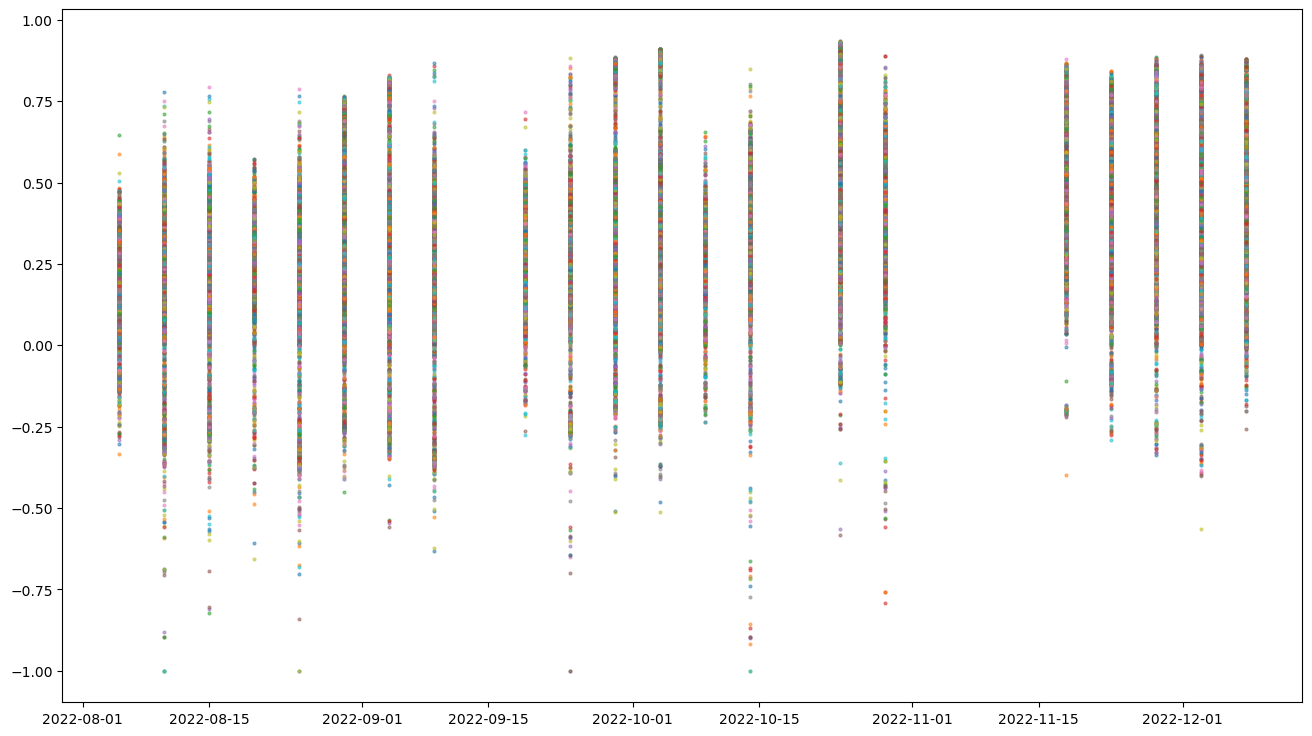

In [56]:
geojson_path = Path.cwd() / "wider_area_2022.geojson"
S2_data_folder = Path.home() / f"Downloads/{Path(geojson_path).stem}"
S2_data_folder.mkdir(parents=True, exist_ok=True)


start_date = "2022-08-01"
end_date = "2022-12-10"

s2_refs, s2_uncs, s2_angles, doys, mask, geotransform, crs = get_s2_official_data(start_date, end_date, geojson_path, S2_data_folder=S2_data_folder)
ndvi = (s2_refs[:, 7] - s2_refs[:, 2]) / (s2_refs[:, 7] + s2_refs[:, 2])

plt.figure(figsize=(16, 9))
_ = plt.plot([datetime.datetime(2022, 1, 1) + datetime.timedelta(days=int(doy)) for doy in doys], ndvi.reshape(len(doys), -1)[:, ::], 'o', markersize=2, alpha=0.5)



## Running ARC

We now proceed to run the ARC code toi estimate the archeytpe model parameters from the S2 observations, for each pixel, fitting to the time series of S2 reflectances. The method is described in Feng et al. (2024).

The user can expore various parameters here in the notebook:

    START_OF_SEASON = 240
    CROP_TYPE = "wheat"
    NUM_SAMPLES = 1000000
    GROWTH_SEASON_LENGTH = 30
    LAZY_EVALUATION_STEP = 100
    start_date = "2022-08-20"
    end_date = "2022-12-10"

These are set to be appropriate for the crop under study (wheat). The time taken to process depends heavily on `NUM_SAMPLES` which controls the number of ensemble members used in the evaluation. Typically `100000` would be sufficient to estimate the mean behaviour. Estimating uncertainty typically requires more members. We use `1000000` here as a default to ensure we get a good solution. This will take around 5 minutes to process, so if you are impatient to proceed, reduce the value of `NUM_SAMPLES`.

Predicting S2 reflectance: 100%|███████████████████████████████████████████████████████████████████████████████████| 300/300 [01:07<00:00,  4.47slice/s]
/Users/plewis/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


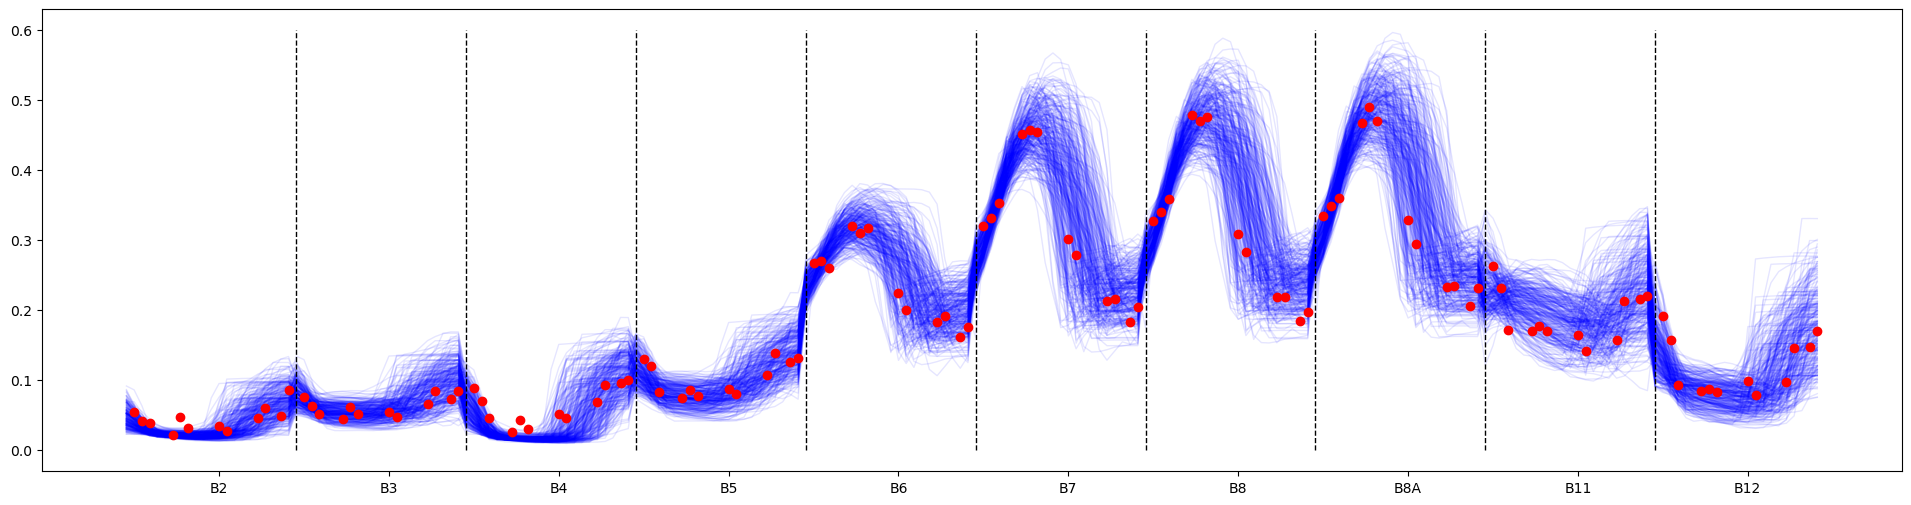

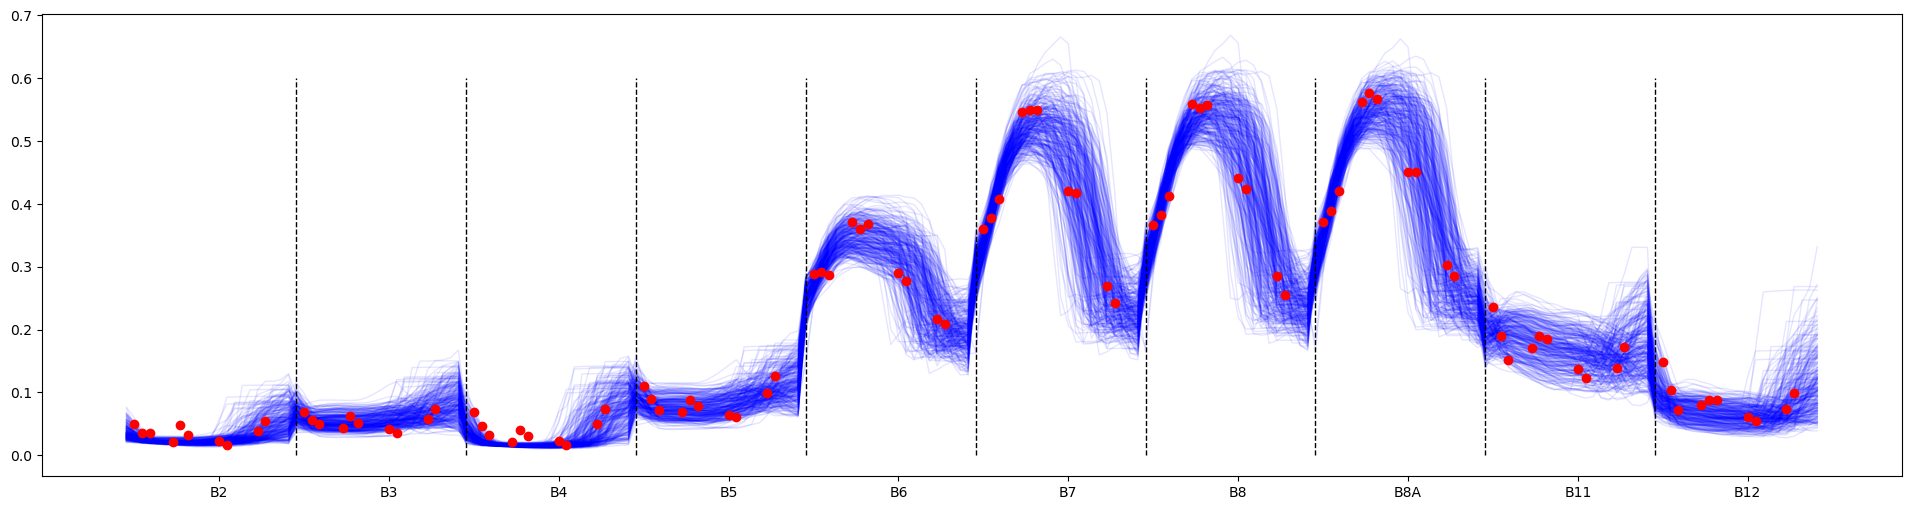

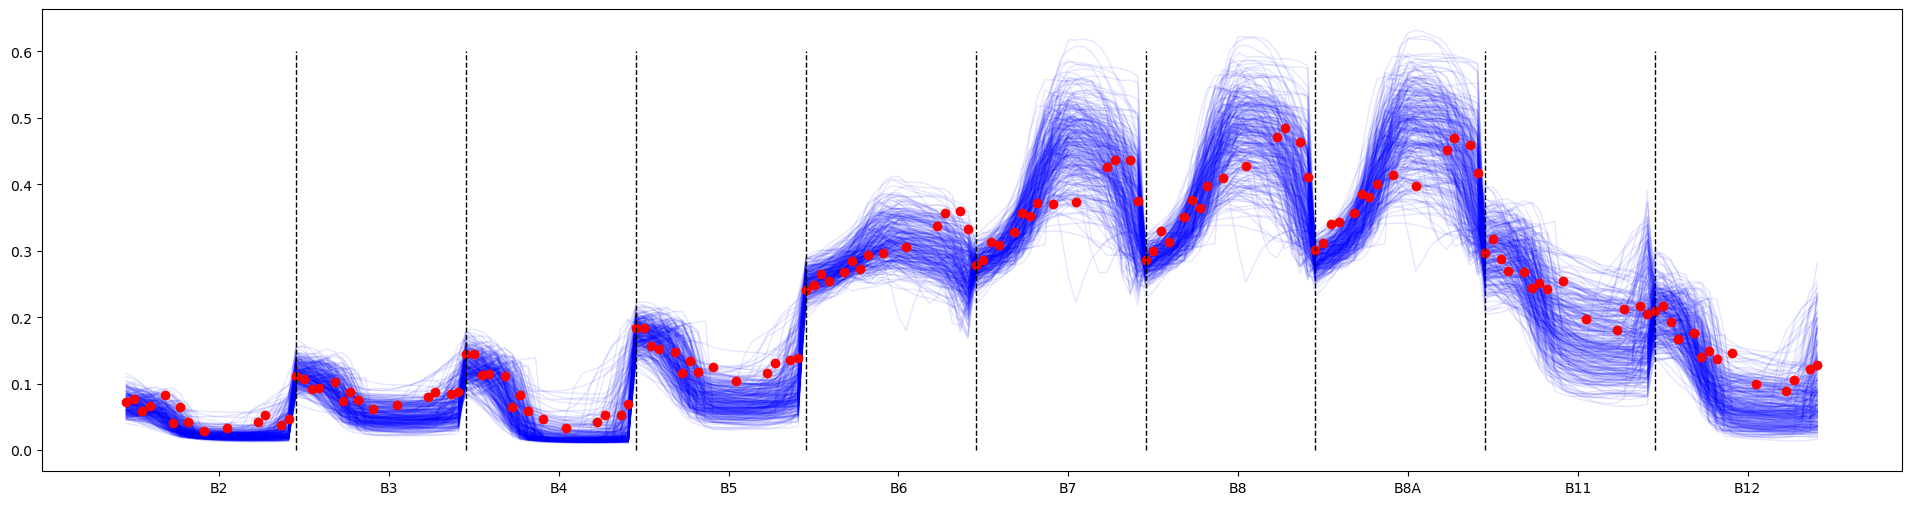

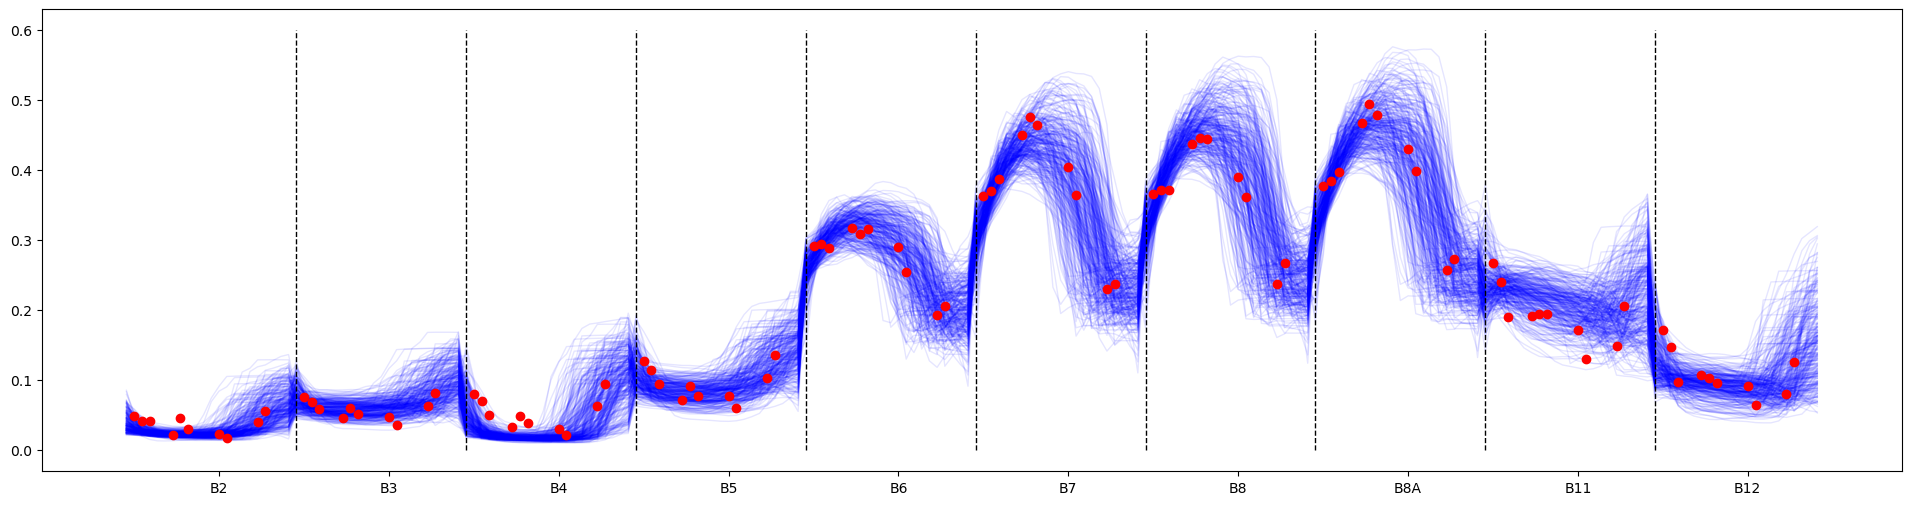

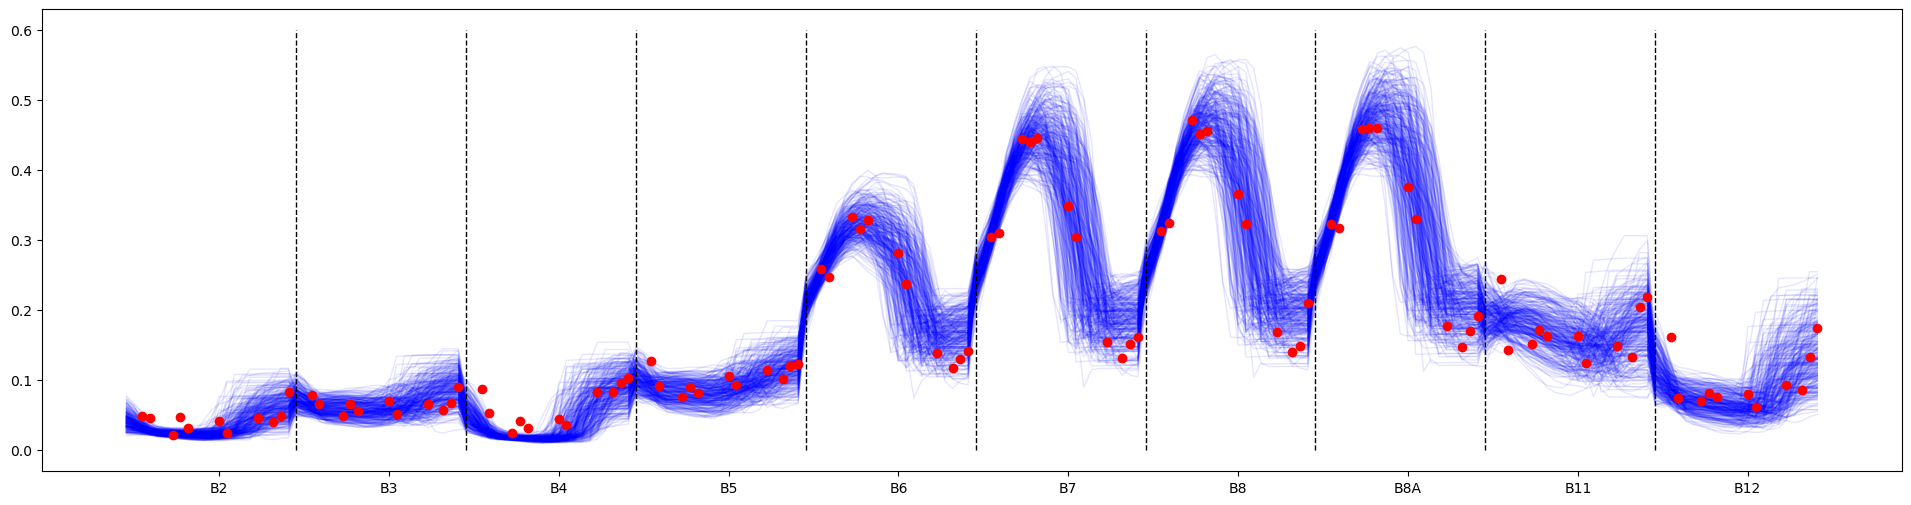

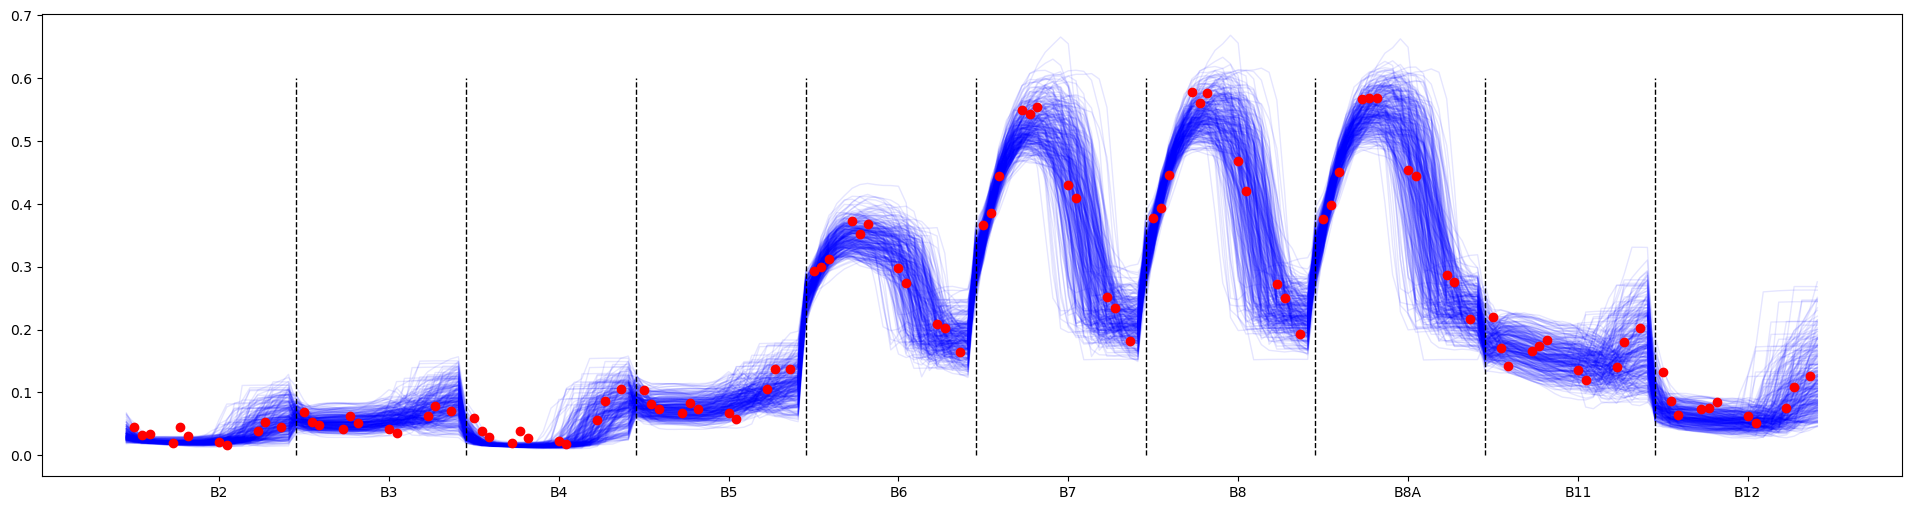

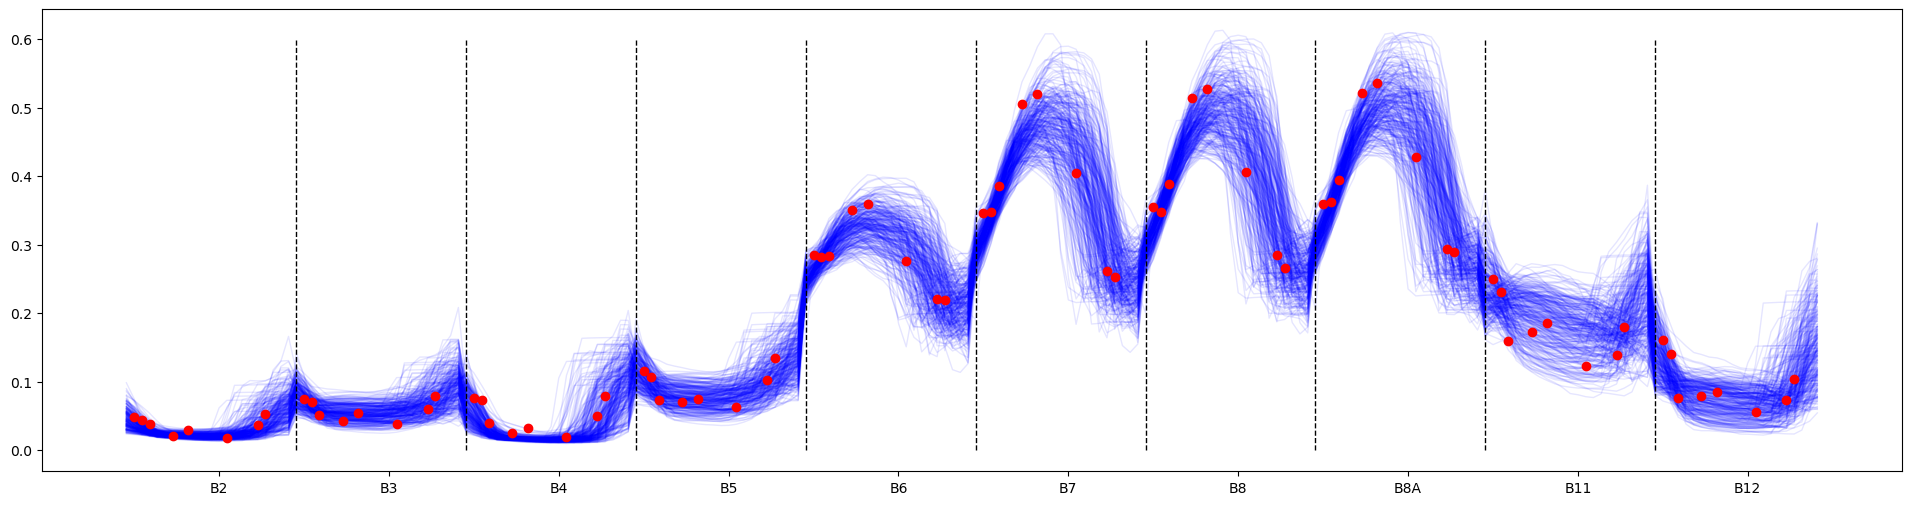

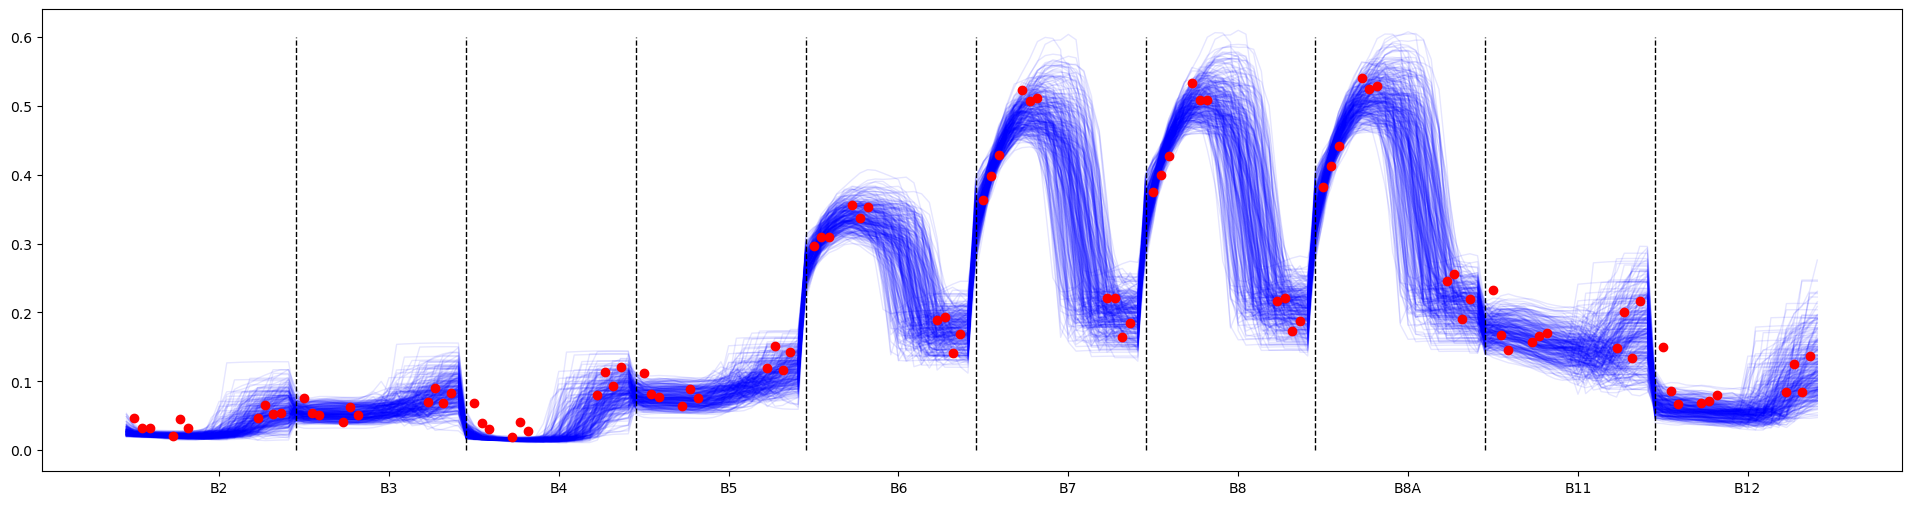

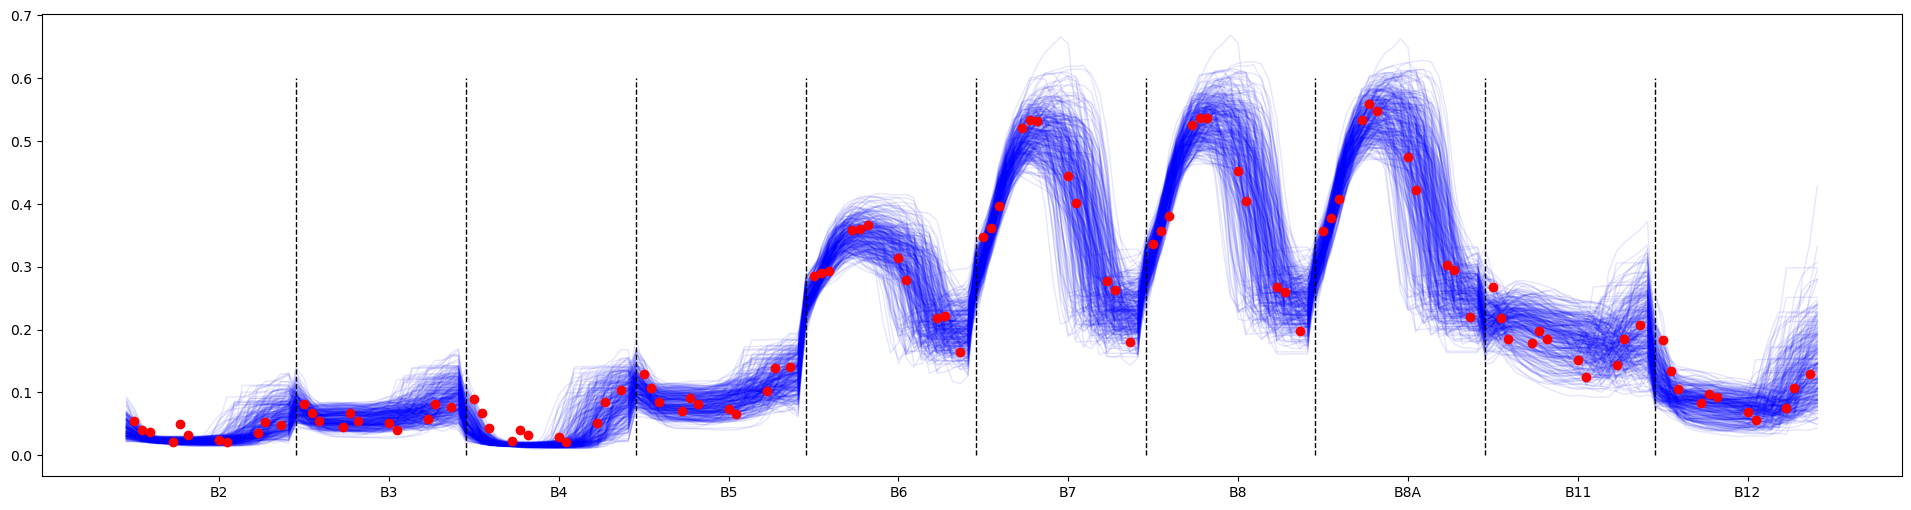

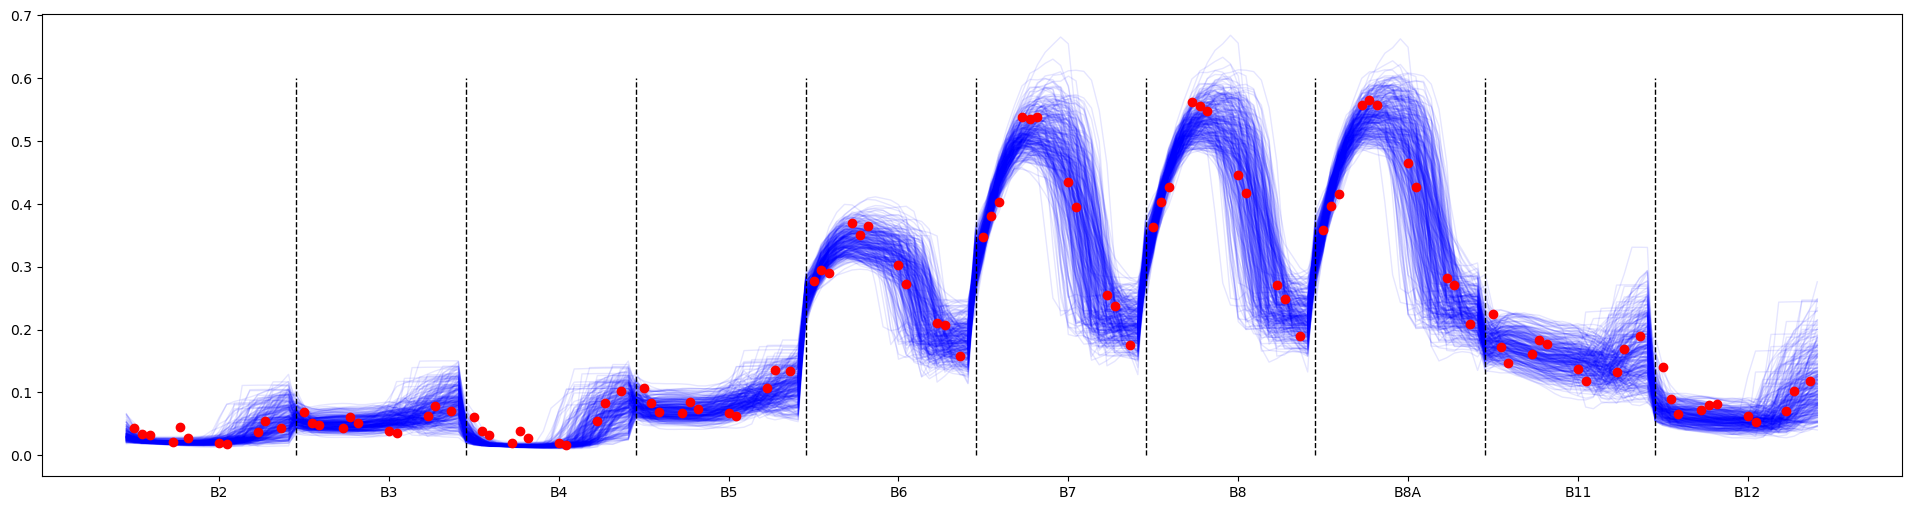

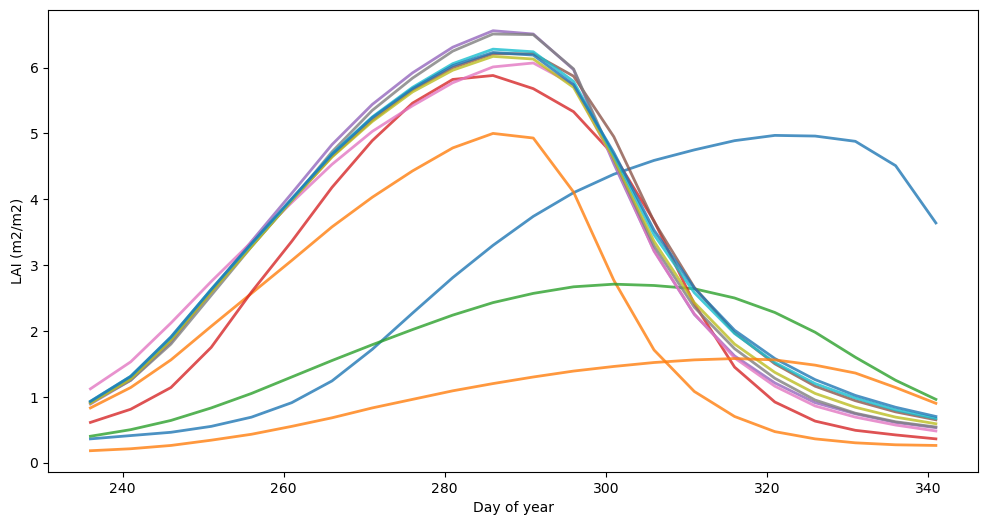

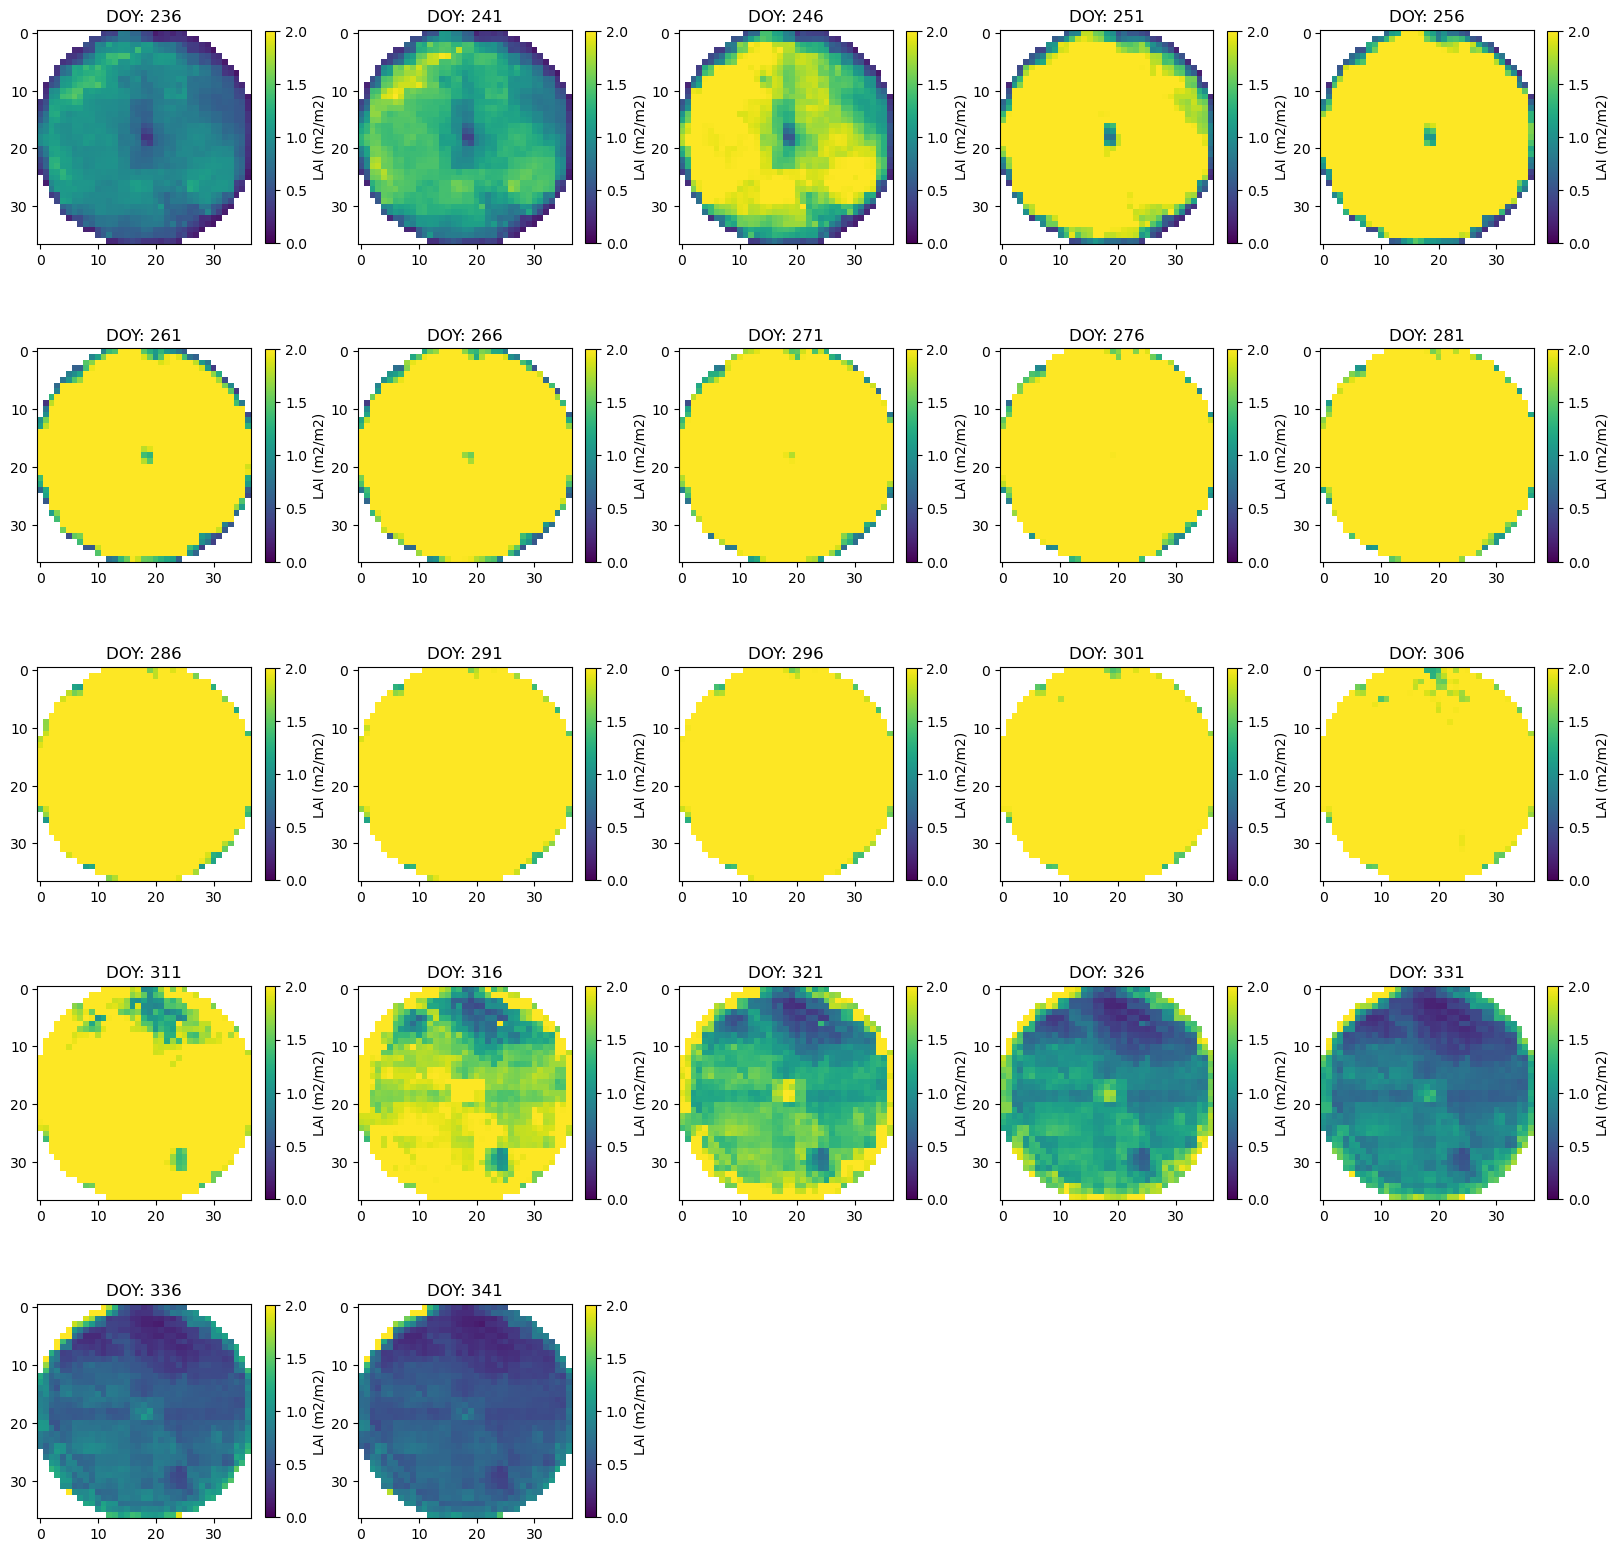

In [57]:
import os
from pathlib import Path

import arc
import matplotlib.pyplot as plt
import numpy as np

# Constants
START_OF_SEASON = 240
CROP_TYPE = "wheat"
NUM_SAMPLES = 1000000
GROWTH_SEASON_LENGTH = 45
LAZY_EVALUATION_STEP = 100
start_date = "2022-08-20"
end_date = "2022-12-10"

# Alternative Constants
#CROP_TYPE = "maize"
#NUM_SAMPLES = 2000000

ALPHA = 0.8
LINE_WIDTH = 2

def main():
    """Main function to execute the Arc field processing and plotting"""

    geojson_path = "SF_2022.geojson"
    S2_data_folder = Path.home() / f"Downloads/{Path(geojson_path).stem}"
    S2_data_folder.mkdir(parents=True, exist_ok=True)

    scale_data, post_bio_tensor, post_bio_unc_tensor, mask, doys = arc.arc_field(
        start_date,
        end_date,
        geojson_path,
        START_OF_SEASON,
        CROP_TYPE,
        f"{S2_data_folder}/SF_field_2022.npz",
        NUM_SAMPLES,
        GROWTH_SEASON_LENGTH,
        str(S2_data_folder),
        plot=True,
    )

    plot_lai_over_time(doys, post_bio_tensor)
    plot_lai_maps(doys, post_bio_tensor, mask)
    return scale_data, post_bio_tensor, post_bio_unc_tensor, mask, doys


def plot_lai_over_time(doys: np.array, post_bio_tensor: np.array):
    """Plot LAI over time"""

    plt.figure(figsize=(12, 6))
    plt.plot(
        doys,
        post_bio_tensor[
            ::LAZY_EVALUATION_STEP,
            4,
        ].T
        / 100,
        "-",
        lw=LINE_WIDTH,
        alpha=ALPHA,
    )
    plt.ylabel("LAI (m2/m2)")
    plt.xlabel("Day of year")
    plt.show()


def plot_lai_maps(doys: np.array, post_bio_tensor: np.array, mask: np.array):
    """Plot LAI maps"""

    lai = post_bio_tensor[:, 4].T / 100
    nrows = int(len(doys) / 5) + int(len(doys) % 5 > 0)
    fig, axs = plt.subplots(ncols=5, nrows=nrows, figsize=(20, 4 * nrows))
    axs = axs.ravel()

    for i in range(len(doys)):
        lai_map = np.zeros(mask.shape) * np.nan
        lai_map[~mask] = lai[i]
        im = axs[i].imshow(lai_map, vmin=0, vmax=2)
        fig.colorbar(im, ax=axs[i], shrink=0.8, label="LAI (m2/m2)")
        axs[i].set_title("DOY: %d" % doys[i])

    # remove empty plots
    for i in range(len(doys), len(axs)):
        axs[i].axis("off")
    plt.show()


if __name__ == "__main__":
    scale_data, post_bio_tensor, post_bio_unc_tensor, mask, doys = main()

The ARC function we use here `arc.arc_field()` calculates the solution, and if `plot=True` will also illustrate the optimal set of ensemble reflectance members (blue lines) and observations (red dots). You should check that that ensemble set covers the observations. That means that there is a good match between the ensemble modelled reflectance and the measurements, so we should ber able to robustly estimate the canopy biophysical parameters.

The reflectance plots are laid out to show reflectance per S2 waveband over time for a number of pixel samples. You should be able to see whether or not the ensembles cover the reflectance at each waveband. If not, then consider changing the parameters, e.g. the season start or end or the number of ensemble samnples.

There is also a plot of sample LAI trajectories over time. We observe that maximum LAI seems to be reached around DOY 300 (October 27th). We can check if this is a sensible interpretation by looking at the exploratory data above.

An image of the spatial LAI interpretation is also shown. Again, we can see the maximum LAI occurring around DOY 300. We notice quite a large variation in apparent LAI over the field, with the south-western portion of the field having maximum LAI of greater that 2, butr other parts of the field barely reaching an LAI of 1 or 1.5 perhaps.

## Leaf Area Index results

We now run some codes to explore the results for LAI:

In [59]:
import geojson
from shapely import geometry

features = geojson.load(open('SF_2022_samples_corrected_parsed.geojson', 'r'))['features']
geoms = []
coords = []
for feature in features:
    
    coord = feature['geometry']['coordinates']
    coords.append(coord[:2])
    
    geom = geometry.Point(coord)
    geoms.append(geom)
_=geometry.GeometryCollection(geoms)

In [60]:
arc_dir = os.path.dirname(os.path.realpath(arc.__file__))
geojson_path = f"{arc_dir}/test_data/SF_2022.geojson"
S2_data_folder = Path.home() / f"Downloads/{Path(geojson_path).stem}"
S2_data_folder.mkdir(parents=True, exist_ok=True)
output_file = f"{S2_data_folder}/SF_field_2022.npz"
f = np.load(output_file)

geotransform = tuple(f.f.geotransform.tolist())
crs = str(f.f.crs)

from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:4326", crs, always_xy=True)
Tcoords = [i for i in transformer.itransform(coords)]


Acoords = np.array([[(i[0] - geotransform[0]) / geotransform[1], (i[1] - geotransform[3]) / geotransform[5]] for i in Tcoords]).astype(int)

In [61]:
s2_lai = post_bio_tensor[:, 4]
s2_cab = post_bio_tensor[:, 1]

temp = np.zeros(mask.shape + (s2_lai.shape[1], ))
temp[~mask] = s2_lai
s2_lai = temp

temp = np.zeros(mask.shape + (s2_cab.shape[1], ))
temp[~mask] = s2_cab
s2_cab = temp

We can visualise the 5 sample locations, with 5 white crosses in the image below indicating the sub0-sampling. Foe each of the 5 samplke plots, we apply a buffer of `n = 3` i.e. a +/- 3 10m pixels around each sample location, so the samples cover around 70 m x 70 m. 

The base image shows the maximum LAI per pixel, confirming the observation above from NDVI that the LAI is higher in the lower left iof the field.

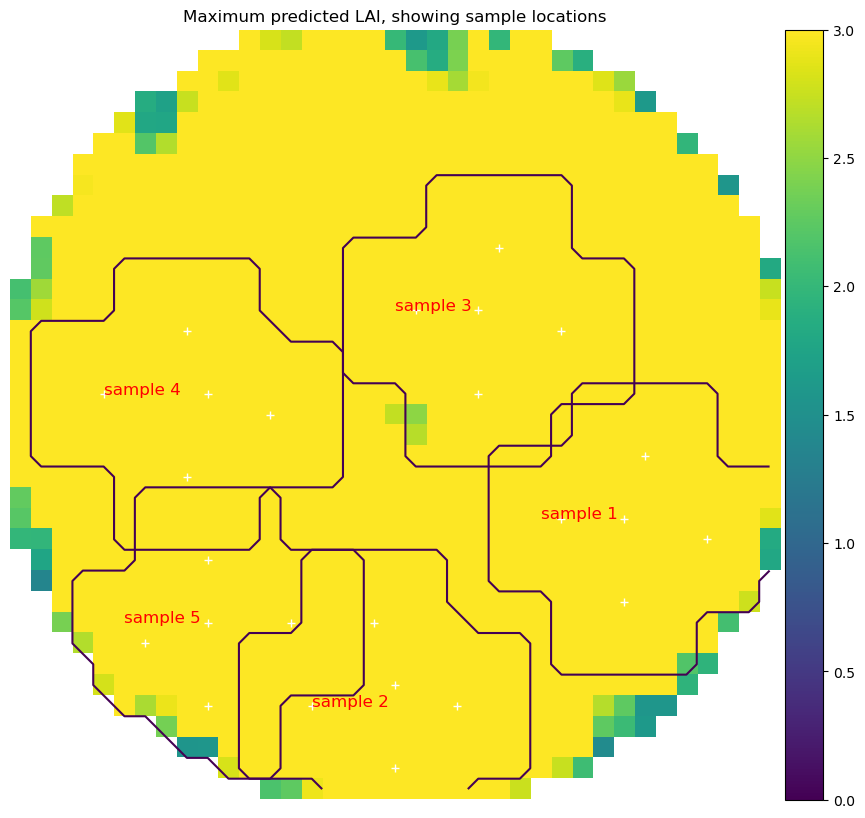

In [62]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# buffer control
n = 3

fig, axs = plt.subplots(nrows=1, ncols = 1, figsize=(20,10))
#axs = axs.ravel()
ax = axs
ax.set_title('Maximum predicted LAI, showing sample locations',fontsize=12)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
mm = np.max(s2_lai,axis=2)/100.
mm[mm==0] = np.nan
all_data = []
im = ax.imshow(mm,vmin=0,vmax=3)
fig.colorbar(im, cax=cax, orientation='vertical')
for i in range(1, 6):
    c =[]
    data = []
    for j in range(1, 6):
        for feature in features:
            field_id = feature['properties']['Name']
            if field_id == f'P{i}S{j}':
                coord = feature['geometry']['coordinates'][:2]
                geom = geometry.Point(coord)
                
                Tcoord = transformer.transform(coord[0], coord[1])
                Acoord = (Tcoord[0] - geotransform[0]) / geotransform[1], (Tcoord[1] - geotransform[3]) / geotransform[5]
                Acoord = np.round(np.array(Acoord)).astype(int) 
                #print(Acoord[1], Acoord[0],np.max(s2_lai[Acoord[1], Acoord[0]]/100.))
                c.append([Acoord[1], Acoord[0]])
                
                lai = feature['properties']['LAI_measurement']
                # cab = feature['properties']['Cab_measurement']
                
                data.append(lai)
    all_data.append(data)
    mask = np.max(s2_lai,axis=2)>0
    omask = mask.copy()
    
    
    #plt.imshow(np.max(s2_lai,axis=2)/100.)
    #plt.imshow(mask)
    #plt.colorbar()
    # buffer +/-n pixels
    
    c = np.array(c)
    for cc in c:
        for k in range(-n,n+1):
            for j in range(-n,n+1):
                try:
                    mask[cc[0]+k,cc[1]+j] = 0
                except:
                    pass
    mask = omask * ~mask
    ax.contour(mask)
    y,x = np.round(c.mean(axis=0)).astype(int)
    ax.text(x-4,y, f'sample {i}', color="red", fontsize=12)
    ax.plot(c.T[1],c.T[0],'w+')

ax.set_axis_off()

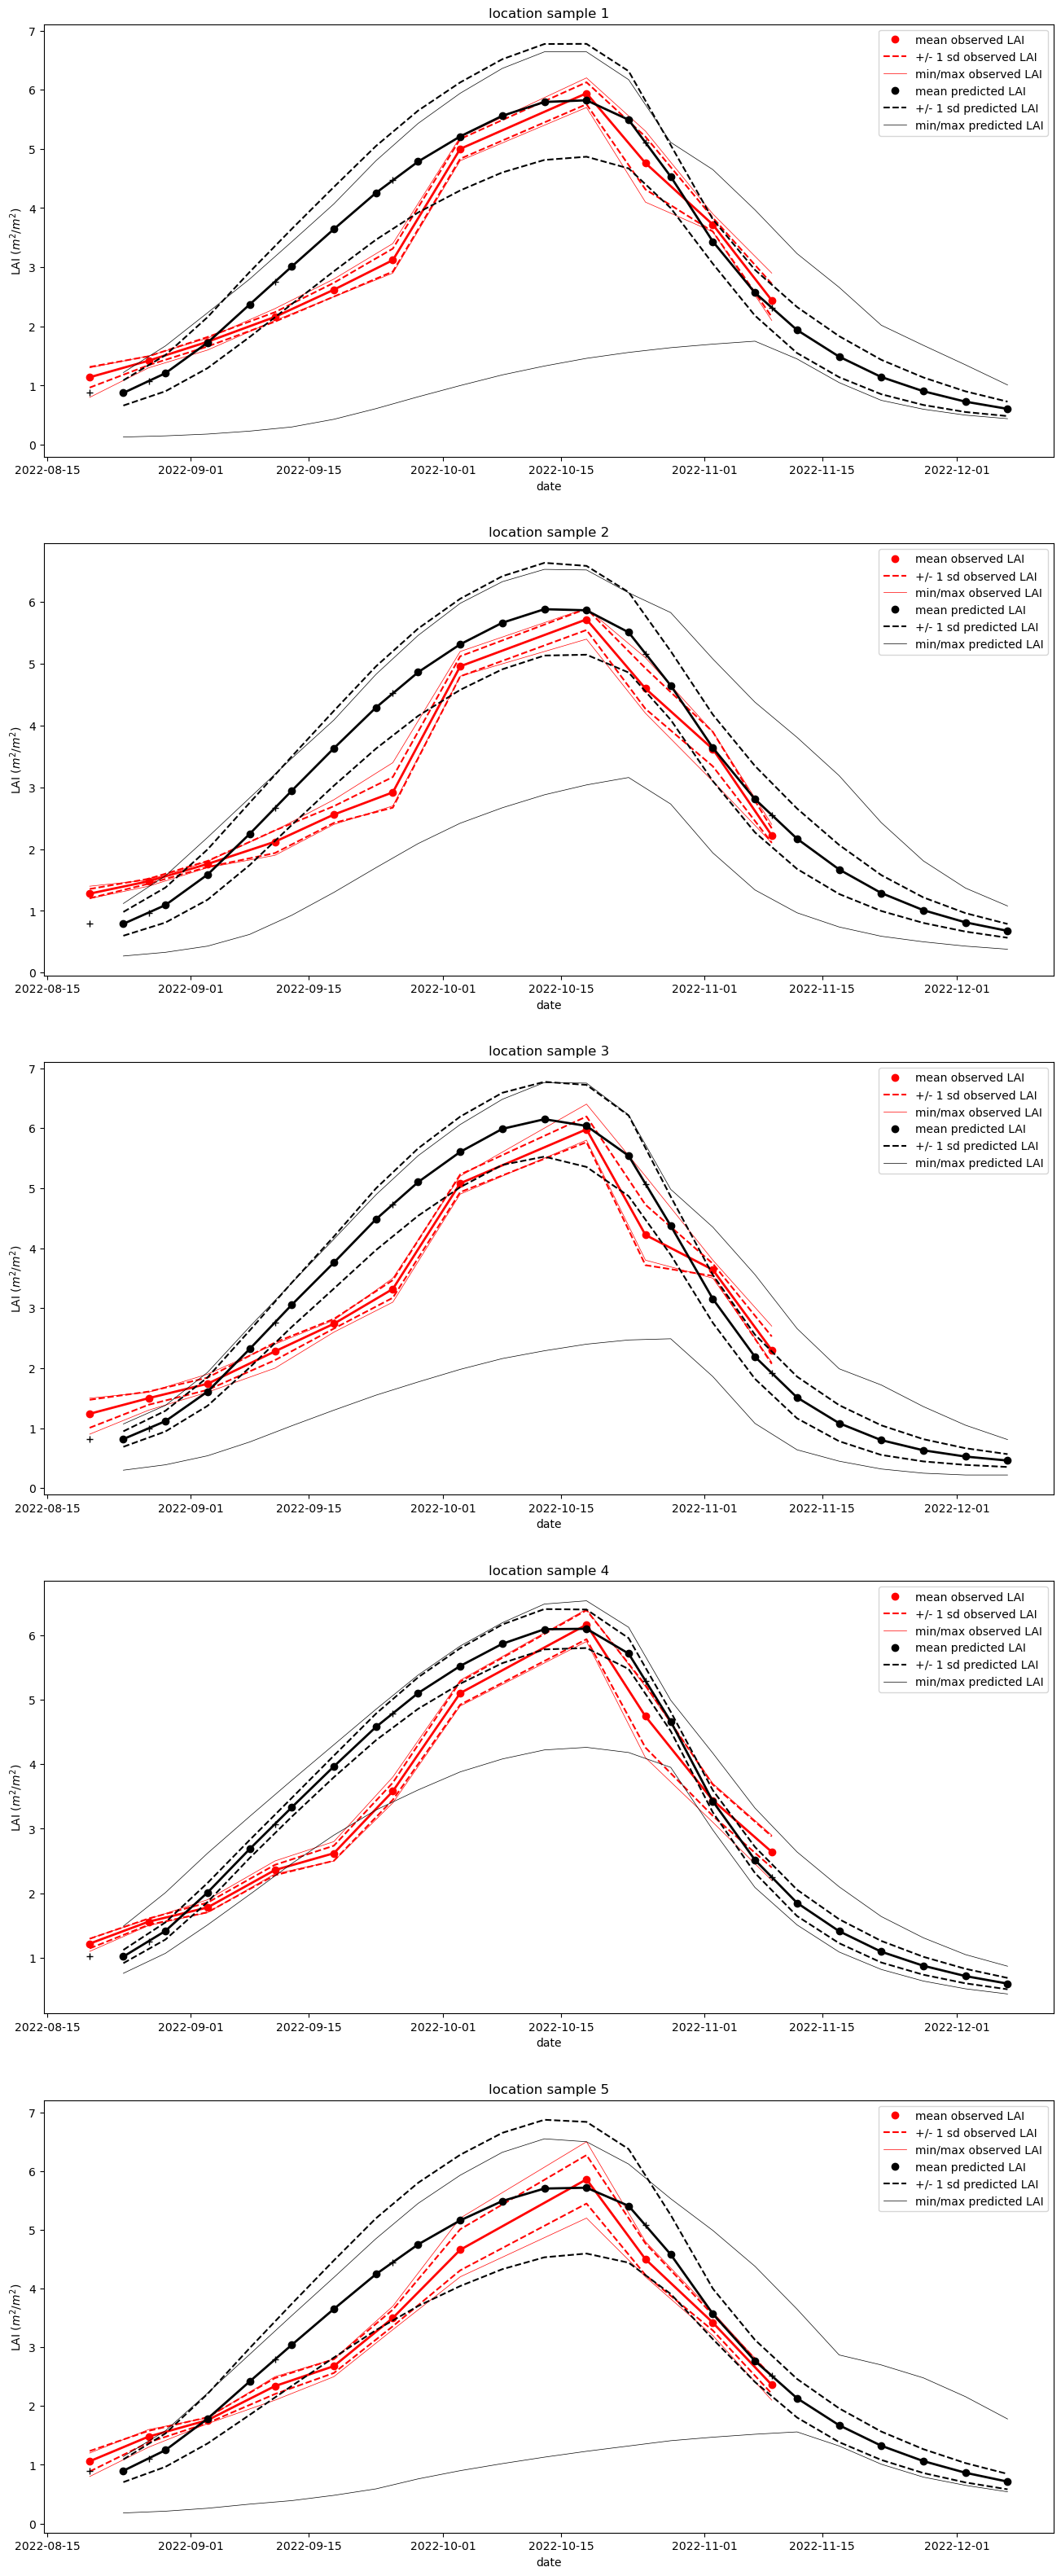

In [63]:
import datetime
import geojson
from shapely import geometry
import pylab as plt


features = geojson.load(open('SF_2022_samples_corrected_parsed.geojson', 'r'))['features']
geoms = []

s2_dates = [datetime.datetime(2022, 1, 1) + datetime.timedelta(days=int(i-1)) for i in doys]

# interpolate to target dates
sample_dates = np.array([int(d.strftime("%j")) for d in s2_dates])


fig, axs = plt.subplots(nrows=5, ncols = 1, figsize=(16, 40))
axs = axs.ravel()

all_target_s2_pred = []
all_data = []
for i in range(1, 6):
    ax = axs[i-1]
    c =[]
    data = []
    for j in range(1, 6):
        for feature in features:
            field_id = feature['properties']['Name']
            if field_id == f'P{i}S{j}':
                coord = feature['geometry']['coordinates'][:2]
                geom = geometry.Point(coord)
                
                Tcoord = transformer.transform(coord[0], coord[1])
                Acoord = (Tcoord[0] - geotransform[0]) / geotransform[1], (Tcoord[1] - geotransform[3]) / geotransform[5]
                Acoord = np.round(np.array(Acoord)).astype(int) 
                #print(Acoord[1], Acoord[0],np.max(s2_lai[Acoord[1], Acoord[0]]/100.))
                c.append([Acoord[1], Acoord[0]])
                
                lai = feature['properties']['LAI_measurement']
                # cab = feature['properties']['Cab_measurement']
                
                data.append(lai)
                dates = [datetime.datetime.strptime(i, '%Y%m%d') for i in feature['properties']['measurement_dates']]
                target_dates = np.array([int(d.strftime("%j")) for d in dates])

    all_data.append(data)
    mask = np.max(s2_lai,axis=2)>0
    omask = mask.copy()
    
    
    
    #plt.imshow(np.max(s2_lai,axis=2)/100.)
    #plt.imshow(mask)
    #plt.colorbar()
    # buffer +/-n pixels
    
    c = np.array(c)
    for cc in c:
        for k in range(-n,n+1):
            for j in range(-n,n+1):
                try:
                    mask[cc[0]+k,cc[1]+j] = 0
                except:
                    pass
    mask = omask * ~mask
        #plt.plot(cc[1],cc[0],'w+')
    #_=plt.imshow(mask * s2_lai.max(axis=2)/100.,vmin=0,vmax=2.5)
    #plt.colorbar()
    #_=plt.plot(s2_dates,(s2_lai[mask]/100.).T,'g+')
    _=ax.plot(dates, np.mean(data,axis=0).T,'r',lw=2)
    _=ax.plot(dates, np.mean(data,axis=0).T,'ro',label='mean observed LAI')
    _=ax.plot(dates, np.mean(data,axis=0).T + np.std(data,axis=0).T,'r--',label='+/- 1 sd observed LAI')
    _=ax.plot(dates, np.mean(data,axis=0).T - np.std(data,axis=0).T,'r--')

    _=ax.plot(dates, np.min(data,axis=0),'r-',lw=0.5,label='min/max observed LAI')
    _=ax.plot(dates, np.max(data,axis=0),'r-',lw=0.5)
    ax.plot(s2_dates,np.mean(s2_lai[mask]/100.,axis=0),'k-',lw=2)
    ax.plot(s2_dates,np.mean(s2_lai[mask]/100.,axis=0),'ko',label='mean predicted LAI')

    ax.plot(s2_dates,np.mean(s2_lai[mask]/100.,axis=0)+np.std(s2_lai[mask]/100.,axis=0),'k--',label='+/- 1 sd predicted LAI')
    ax.plot(s2_dates,np.mean(s2_lai[mask]/100.,axis=0)-np.std(s2_lai[mask]/100.,axis=0),'k--')

    ax.plot(s2_dates,np.min(s2_lai[mask]/100.,axis=0),'k-',lw=0.5,label='min/max predicted LAI')
    ax.plot(s2_dates,np.max(s2_lai[mask]/100.,axis=0),'k-',lw=0.5)
    ax.set_xlabel('date')
    ax.set_ylabel('LAI $(m^2/m^2)$')
    ax.set_title(f'location sample {i}',fontsize=12)
    
    # interpolate to target dates
    target_s2_pred = np.array([np.interp(target_dates,sample_dates,d) for d in (s2_lai[mask]/100.)]).T
    _=ax.plot(dates,np.mean(target_s2_pred,axis=1),'k+')
    all_target_s2_pred.append(target_s2_pred)
    ax.legend()
    



The plots above visualise the observed (red) and predicted (black) patterns of LAI over time. The 9 field observations are shown as red dots. The LAI predicted from S2 using ARC is calculated at regular intervals (black dots). 

The results show a clear under-estimation of LAI in the S2 ARC results that is quite consistent over time. Sample 5 seems generally clioser to the observations than the other samples.  

If we plot the measured and S2-ARC-modelled data together for each of the 5 sample locations and 9 time periods, we can see how well the model predicts the (independent) LAI observations. 

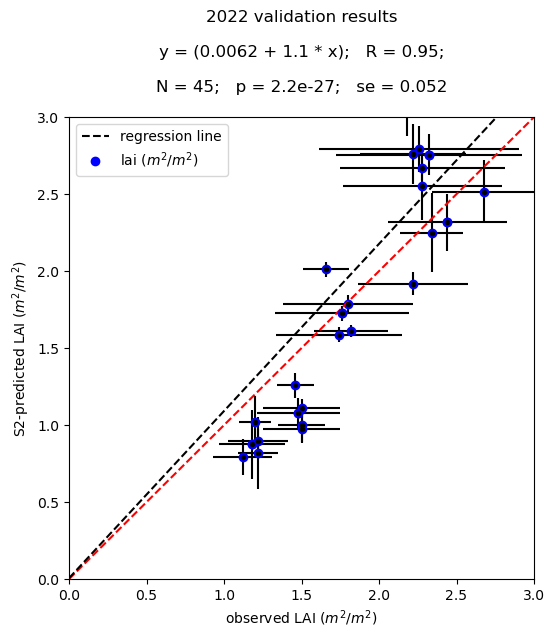

In [64]:

# plot limit
m = 3

mean_pred = np.array([np.mean(d,axis=1) for d in all_target_s2_pred])
mean_obs = np.mean(all_data,axis=0)
std_pred = np.array([np.std(d,axis=1) for d in all_target_s2_pred])
std_obs = np.std(all_data,axis=0)

plt.figure(figsize=(6,6))
plt.errorbar(mean_obs.ravel(),mean_pred.ravel(),std_obs.ravel(),std_pred.ravel(),'k.')
plt.plot(mean_obs,mean_pred,'bo')

plt.plot([0.,m],[0.,m],'r--')
plt.xlabel('observed LAI ($m^2/m^2$)')
plt.ylabel('S2-predicted LAI ($m^2/m^2$)')

plt.xlim(0,m)
plt.ylim(0,m)

from scipy.stats import linregress
slope, intercept, r, p, se = linregress(mean_obs.ravel(),mean_pred.ravel())

plt.title(f'2022 validation results\n\ny = ({intercept:.2} + {slope:.2} * x);   R = {r:.2};\n\nN = 45;   p = {p:.2};   se = {se:.2}\n')
plt.plot([0.,m],[intercept,intercept+slope*m],'k--',\
         label=f'regression line')

plt.plot(mean_obs[0],mean_pred[0],'bo',label='lai ($m^2/m^2$)')

_=plt.legend()


The plot shows S2-ARC-predicted LAI (y-axis) against observed LAI (x-axis) for the 5 x 9 (N=45) samples. The LAI mean samples over the 5 sub-locations for observations and over the buffer areas shown above are used to calculate mean and standard deviation. The mean is shown as the blue dot, with +/- 1 standard deviation shown as the error bars. 

The regression shows a strong linear relationship (R=0.88) between LAI predicted from S2 compared to ground observations for 2022. But there is an apparent bias of -0.24 and a slope of 0.7, i.e. the S2-predictions under-predict the actual LAI. Most of the piints lie around the regression line, but there seems to be a cluster of outliers that are closer to the 1:1 line. Those points are mainly from the last time sample taken, which can be confirmed looking at the time plots above.

## Chlorophyll results

We now examine the results for Chlorophyll (Cab), following the same approach as above:


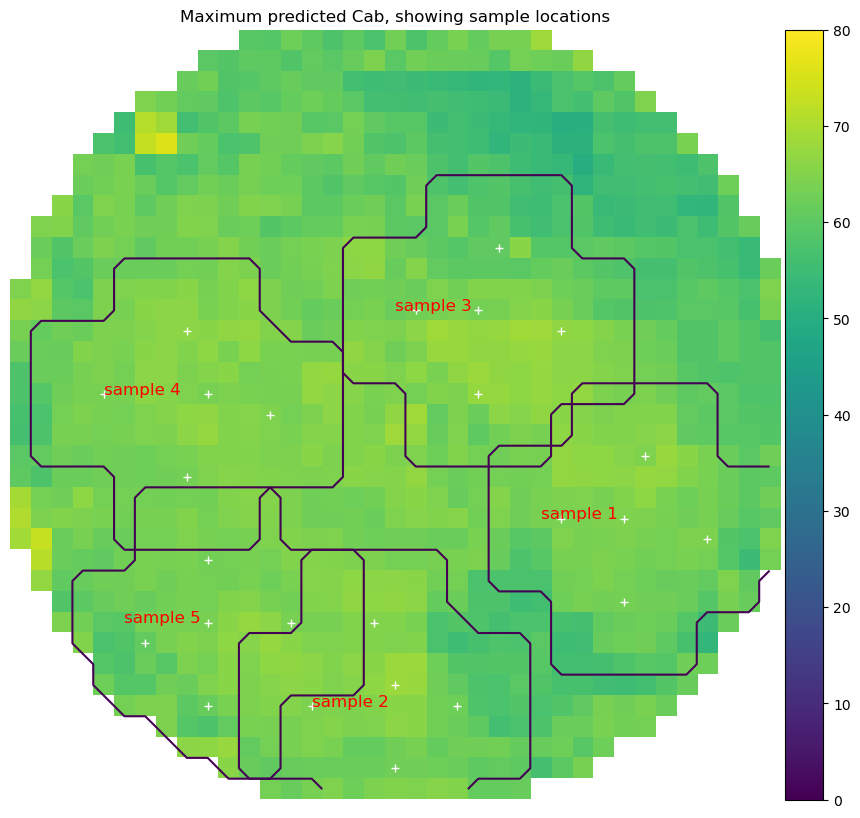

In [65]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# buffer control
n = 3

fig, axs = plt.subplots(nrows=1, ncols = 1, figsize=(20,10))
#axs = axs.ravel()
ax = axs
ax.set_title('Maximum predicted Cab, showing sample locations',fontsize=12)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
mm = np.max(s2_cab,axis=2)/100.
mm[mm==0] = np.nan
im = ax.imshow(mm,vmin=0,vmax=80)
fig.colorbar(im, cax=cax, orientation='vertical')
for i in range(1, 6):
    c =[]
    data = []
    for j in range(1, 6):
        for feature in features:
            field_id = feature['properties']['Name']
            if field_id == f'P{i}S{j}':
                coord = feature['geometry']['coordinates'][:2]
                geom = geometry.Point(coord)
                
                Tcoord = transformer.transform(coord[0], coord[1])
                Acoord = (Tcoord[0] - geotransform[0]) / geotransform[1], (Tcoord[1] - geotransform[3]) / geotransform[5]
                Acoord = np.round(np.array(Acoord)).astype(int) 
                #print(Acoord[1], Acoord[0],np.max(s2_lai[Acoord[1], Acoord[0]]/100.))
                c.append([Acoord[1], Acoord[0]])
                
                lai = feature['properties']['Cab_measurement']
                # cab = feature['properties']['Cab_measurement']
                
                data.append(lai)
    all_data.append(data)
    mask = np.max(s2_cab,axis=2)>0
    omask = mask.copy()
    
    
    #plt.imshow(np.max(s2_lai,axis=2)/100.)
    #plt.imshow(mask)
    #plt.colorbar()
    # buffer +/-n pixels
    
    c = np.array(c)
    for cc in c:
        for k in range(-n,n+1):
            for j in range(-n,n+1):
                try:
                    mask[cc[0]+k,cc[1]+j] = 0
                except:
                    pass
    mask = omask * ~mask
    ax.contour(mask)
    y,x = np.round(c.mean(axis=0)).astype(int)
    ax.text(x-4,y, f'sample {i}', color="red", fontsize=12)
    ax.plot(c.T[1],c.T[0],'w+')

ax.set_axis_off()

The maximum Chlorophyll concentration (Cab) predicted by ARC with S2 data is quite consistent over the field, with values around 70 $\mu g / cm^2$.

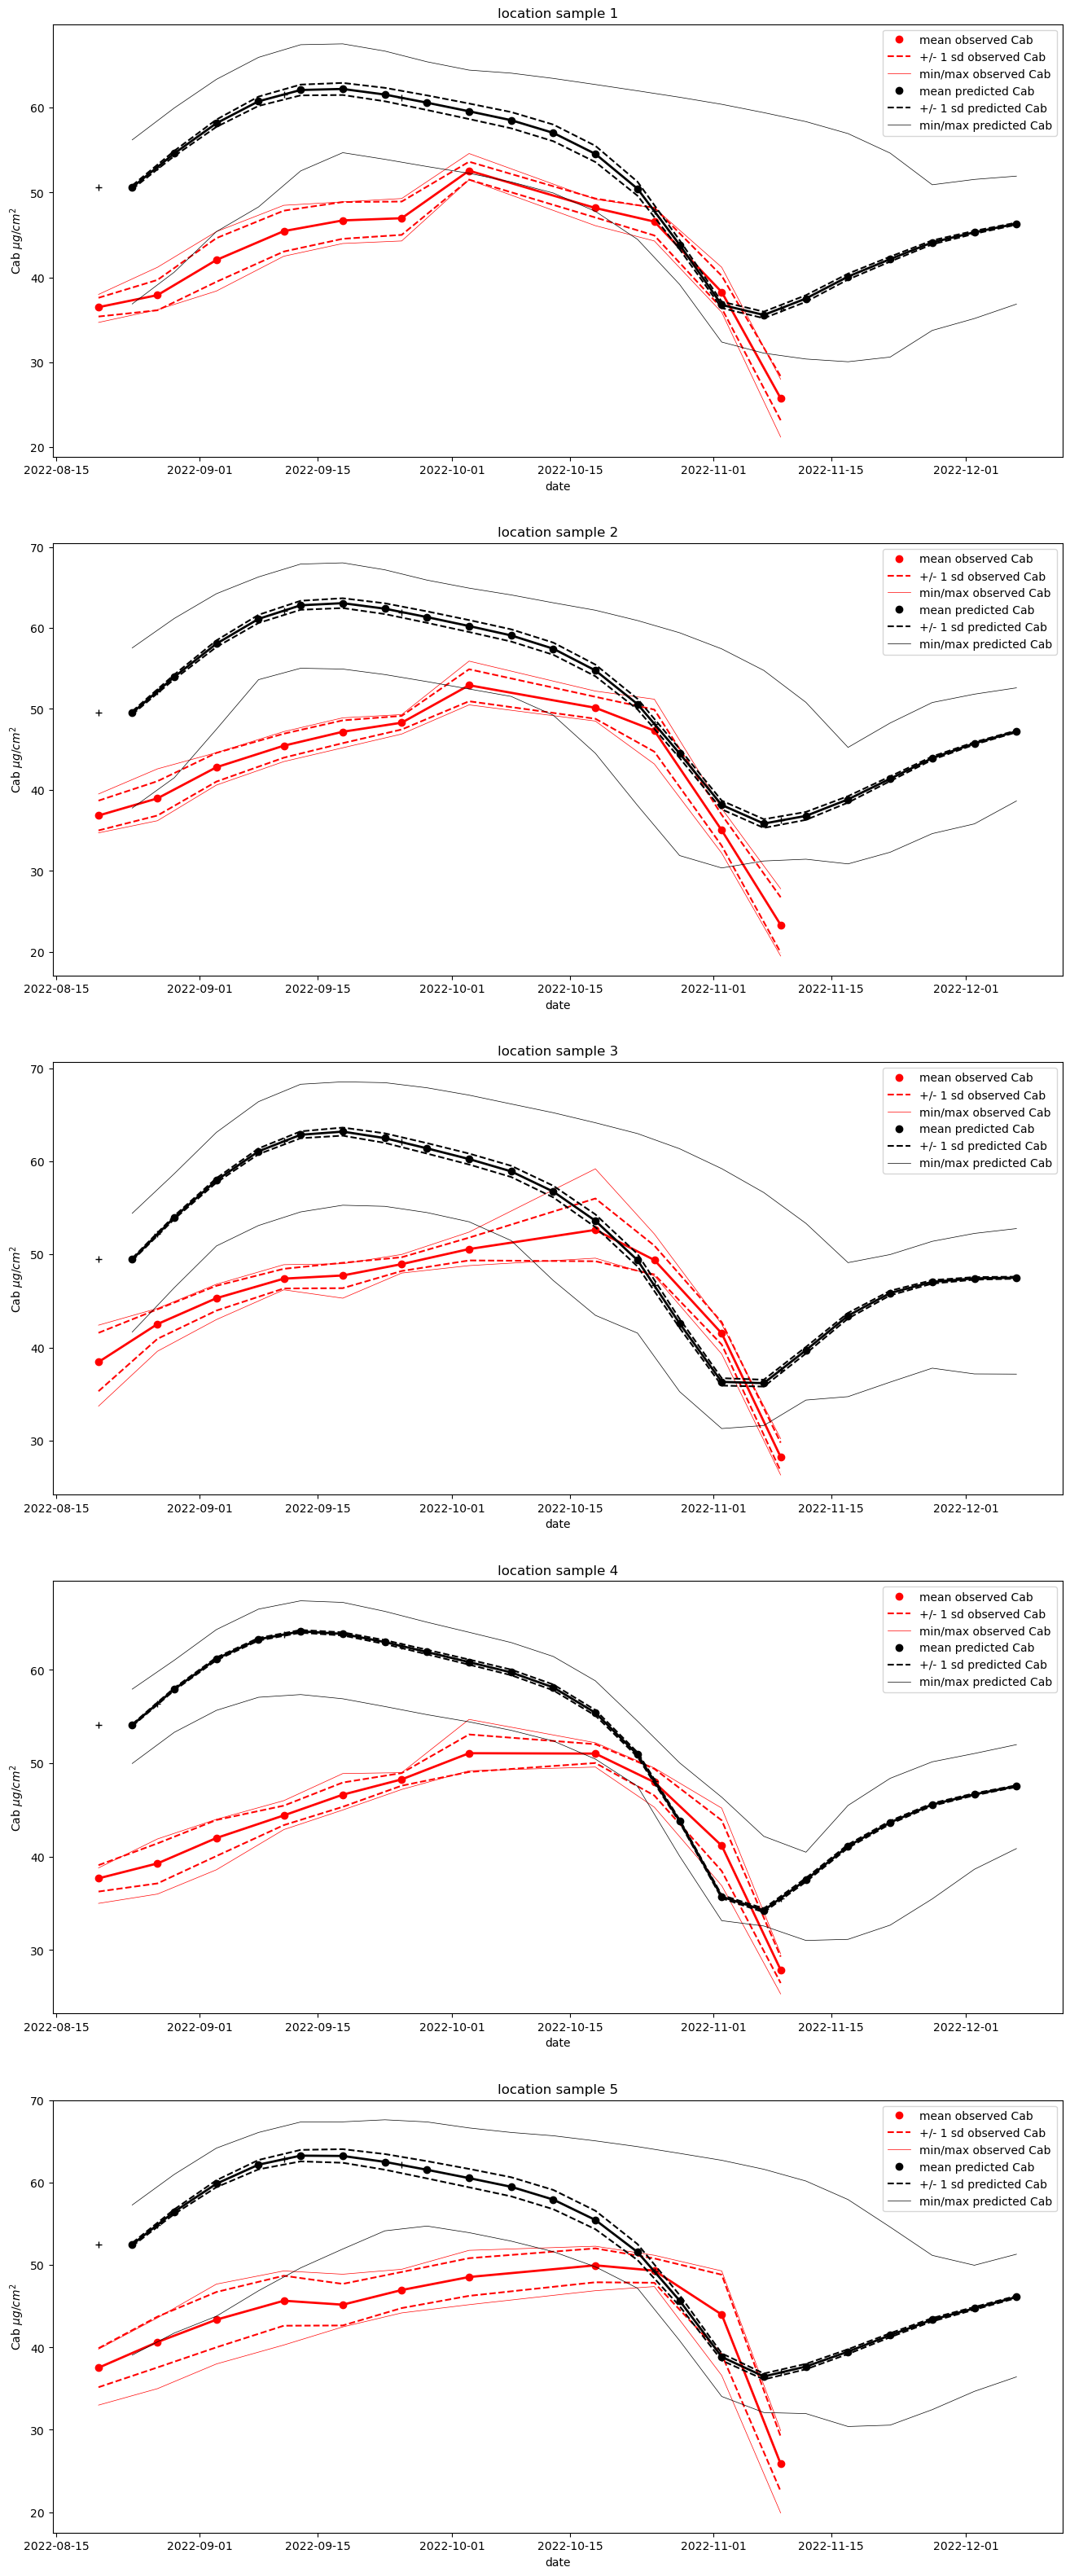

In [66]:
import datetime
import geojson
from shapely import geometry
import pylab as plt


features = geojson.load(open('SF_2022_samples_corrected_parsed.geojson', 'r'))['features']
geoms = []

s2_dates = [datetime.datetime(2022, 1, 1) + datetime.timedelta(days=int(i-1)) for i in doys]

# interpolate to target dates
sample_dates = np.array([int(d.strftime("%j")) for d in s2_dates])


fig, axs = plt.subplots(nrows=5, ncols = 1, figsize=(16, 40))
axs = axs.ravel()

all_target_s2_pred = []
all_data = []
for i in range(1, 6):
    ax = axs[i-1]
    c =[]
    data = []
    for j in range(1, 6):
        for feature in features:
            field_id = feature['properties']['Name']
            if field_id == f'P{i}S{j}':
                coord = feature['geometry']['coordinates'][:2]
                geom = geometry.Point(coord)
                
                Tcoord = transformer.transform(coord[0], coord[1])
                Acoord = (Tcoord[0] - geotransform[0]) / geotransform[1], (Tcoord[1] - geotransform[3]) / geotransform[5]
                Acoord = np.round(np.array(Acoord)).astype(int) 
                #print(Acoord[1], Acoord[0],np.max(s2_lai[Acoord[1], Acoord[0]]/100.))
                c.append([Acoord[1], Acoord[0]])
                
                lai = feature['properties']['Cab_measurement']
                # cab = feature['properties']['Cab_measurement']
                
                data.append(lai)
                dates = [datetime.datetime.strptime(i, '%Y%m%d') for i in feature['properties']['measurement_dates']]
                target_dates = np.array([int(d.strftime("%j")) for d in dates])

    all_data.append(data)
    mask = np.max(s2_lai,axis=2)>0
    omask = mask.copy()
    
    
    
    #plt.imshow(np.max(s2_lai,axis=2)/100.)
    #plt.imshow(mask)
    #plt.colorbar()
    # buffer +/-n pixels
    
    c = np.array(c)
    for cc in c:
        for k in range(-n,n+1):
            for j in range(-n,n+1):
                try:
                    mask[cc[0]+k,cc[1]+j] = 0
                except:
                    pass
    mask = omask * ~mask
        #plt.plot(cc[1],cc[0],'w+')
    #_=plt.imshow(mask * s2_lai.max(axis=2)/100.,vmin=0,vmax=2.5)
    #plt.colorbar()
    #_=plt.plot(s2_dates,(s2_lai[mask]/100.).T,'g+')
    _=ax.plot(dates, np.mean(data,axis=0).T,'r',lw=2)
    _=ax.plot(dates, np.mean(data,axis=0).T,'ro',label='mean observed Cab')
    _=ax.plot(dates, np.mean(data,axis=0).T + np.std(data,axis=0).T,'r--',label='+/- 1 sd observed Cab')
    _=ax.plot(dates, np.mean(data,axis=0).T - np.std(data,axis=0).T,'r--')

    _=ax.plot(dates, np.min(data,axis=0),'r-',lw=0.5,label='min/max observed Cab')
    _=ax.plot(dates, np.max(data,axis=0),'r-',lw=0.5)
    ax.plot(s2_dates,np.mean(s2_cab[mask]/100.,axis=0),'k-',lw=2)
    ax.plot(s2_dates,np.mean(s2_cab[mask]/100.,axis=0),'ko',label='mean predicted Cab')

    ax.plot(s2_dates,np.mean(s2_cab[mask]/100.,axis=0)+np.std(s2_lai[mask]/100.,axis=0),'k--',label='+/- 1 sd predicted Cab')
    ax.plot(s2_dates,np.mean(s2_cab[mask]/100.,axis=0)-np.std(s2_lai[mask]/100.,axis=0),'k--')

    ax.plot(s2_dates,np.min(s2_cab[mask]/100.,axis=0),'k-',lw=0.5,label='min/max predicted Cab')
    ax.plot(s2_dates,np.max(s2_cab[mask]/100.,axis=0),'k-',lw=0.5)
    ax.set_xlabel('date')
    ax.set_ylabel('Cab $\mu g / cm^2$')
    ax.set_title(f'location sample {i}',fontsize=12)
    
    # interpolate to target dates
    target_s2_pred = np.array([np.interp(target_dates,sample_dates,d) for d in (s2_cab[mask]/100.)]).T
    _=ax.plot(dates,np.mean(target_s2_pred,axis=1),'k+')
    all_target_s2_pred.append(target_s2_pred)
    ax.legend()
    



We now find that the Cab concentration is over-estimated by the ARC method here. The timimg of the peak of Cab is quite similar for all samples, although the peak from ARC seems slightly earlier than the peak for the measurements. 

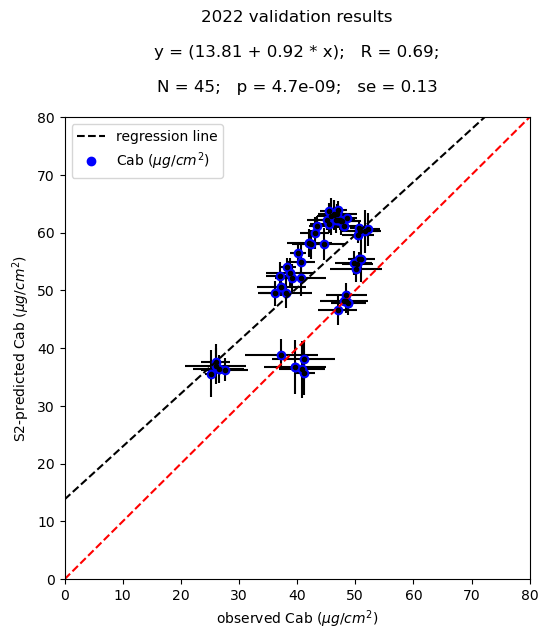

In [67]:

# plot limit
m = 80

mean_pred = np.array([np.mean(d,axis=1) for d in all_target_s2_pred])
mean_obs = np.mean(all_data,axis=0)
std_pred = np.array([np.std(d,axis=1) for d in all_target_s2_pred])
std_obs = np.std(all_data,axis=0)

plt.figure(figsize=(6,6))
plt.errorbar(mean_obs.ravel(),mean_pred.ravel(),std_obs.ravel(),std_pred.ravel(),'k.')
plt.plot(mean_obs,mean_pred,'bo')

plt.plot([0.,m],[0.,m],'r--')
plt.xlabel('observed Cab ($\mu g/cm^2$)')
plt.ylabel('S2-predicted Cab ($\mu g/cm^2$)')

plt.xlim(0,m)
plt.ylim(0,m)

from scipy.stats import linregress
slope, intercept, r, p, se = linregress(mean_obs.ravel(),mean_pred.ravel())

plt.title(f'2022 validation results\n\ny = ({intercept:.2f} + {slope:.2} * x);   R = {r:.2};\n\nN = 45;   p = {p:.2};   se = {se:.2}\n')
plt.plot([0.,m],[intercept,intercept+slope*m],'k--',\
         label=f'regression line')

plt.plot(mean_obs[0],mean_pred[0],'bo',label='Cab ($\mu g/cm^2$)')

_=plt.legend()


The validation for 2022 indicates a bias of around 16 $\mu g / cm^2$ in the S2 predictions, but the slope is very close to unity. 

## Summary

In summary, we have perfomed a comparison of field-measured LAI and Cab over a rain-fed wheat field with estimsates of those biophysical parameters obtained from the ARC method. Observations were taken at 9 times over the season in 2022. There is a similar number of satellite observations that cover the field from cloud-free Sentinel-2 MSI data.

The approach is able to find a solution for ensemble estimates of reflectance in all S2 wavebands, and make consistent spatial and temporal estimates of LAI and Cab (and other biophysical variables, see Feng et al., 2024). When compared to field observations, the S2 ARC estimates appear to cover the same temporal pattern as the ground observations, although the peak in values for the S2 estimates is slightly early compared to the field data. That could be an issue with not having sufficient samples of S2 at appropriate times. The LAI has a bias of 0.24, which is quite low, but a slope of around 0.7, showing a consistent under-0estimate with respect to the field LAI data. For Cab, there is a simple bias of around 16 $\mu g / cm^2$ in the S2 estimates.


All of the data and codes for users running their own experiments along the same lines as this are provided in this notebook. There is a similar mortebook and dataset for data from an irrigated wheat field measured in 2022.